In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline, AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.corpus import stopwords
from scipy import stats
import nltk
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
iphone = pd.read_json("reddit_iphone.json")

In [4]:
iphone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    9815 non-null   object
 1   Upvotes  9815 non-null   int64 
 2   URL      9815 non-null   object
 3   Created  9815 non-null   int64 
 4   Text     9815 non-null   object
dtypes: int64(2), object(3)
memory usage: 383.5+ KB


In [5]:
iphone = iphone.drop_duplicates()

In [6]:
iphone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1562 non-null   object
 1   Upvotes  1562 non-null   int64 
 2   URL      1562 non-null   object
 3   Created  1562 non-null   int64 
 4   Text     1562 non-null   object
dtypes: int64(2), object(3)
memory usage: 73.2+ KB


In [7]:
import re

In [8]:
iphone_model_pattern = r'iPhone\s*(\d{1,3})(?:\s*(Pro\s*Max|Pro|Max|Mini|Plus|SE))?'

In [9]:
iphone.loc[:, 'Model'] = iphone['Text'].apply(
    lambda title: next((f"iPhone {model}" for model in re.findall(iphone_model_pattern, str(title))), None)
)

iphone.loc[:, 'Model'] = iphone['Model'].fillna(
    iphone['Text'].apply(
        lambda text: next((f"iPhone {model}" for model in re.findall(iphone_model_pattern, str(text))), None)
    )
)

In [10]:
iphone = iphone[iphone['Model'].notna()]

In [11]:
iphone

,Title,Upvotes,URL,Created,Text,Model
2,What are your opinions on the iPhone 13?,1,https://www.reddit.com/r/iphone/comments/1hyt5...,1736591161,I’ve been using my iPhone 11 for a few years n...,"iPhone ('11', '')"
11,ISSUE IPhone 16 pro max,2,https://i.redd.it/br9rx4vh0cce1.jpeg,1736586917,Hi! I have recently bought my iPhone 16 pro ma...,"iPhone ('16', '')"
16,iPhone 11 can’t get the latest update iOS 18.2.1,2,https://www.reddit.com/r/iphone/comments/1hyrz...,1736586000,"Hey, does someone know why I can’t install the...","iPhone ('11', '')"
20,Photos App - Some photo's preview change to de...,1,https://www.reddit.com/r/iphone/comments/1hyrd...,1736583151,I recently noticed an issue on my iPhone after...,"iPhone ('15', 'Pro')"
23,iPhone 16 Pro Max,12,https://www.reddit.com/gallery/1hyr9ei,1736582638,Someone PLEASE help\nI recently got the iPhone...,"iPhone ('16', 'Pro Max')"
...,...,...,...,...,...,...
8703,Does Playground work for anyone?,5,https://i.redd.it/m4l293ho09be1.jpeg,1736114810,Just got an iPhone 16 Pro and keep on getting ...,"iPhone ('16', 'Pro')"
8888,Does anyone actually use the new camera button?,35,https://www.reddit.com/r/iphone/comments/1hylf...,1736561221,We're a few months into the iPhone 16 Pro: doe...,"iPhone ('16', 'Pro')"
8979,15 to 13 mini,910,https://www.reddit.com/gallery/1hy8595,1736526129,"Since the release of the iPhone 13 mini, I’ve ...","iPhone ('13', '')"
9041,Any ideas of what i should do with my spare iP...,195,https://www.reddit.com/gallery/1hxxppw,1736488260,I have an iPhone 8 Plus that just lies around ...,"iPhone ('8', 'Plus')"


In [12]:
iphone['Model'].value_counts()

Model
iPhone ('16', '')           46
iPhone ('16', 'Pro')        33
iPhone ('16', 'Pro Max')    31
iPhone ('13', '')           26
iPhone ('15', '')           26
iPhone ('14', '')           25
iPhone ('12', '')           15
iPhone ('11', '')           11
iPhone ('13', 'Pro')        11
iPhone ('8', 'Plus')         9
iPhone ('15', 'Pro Max')     8
iPhone ('7', '')             7
iPhone ('11', 'Pro')         7
iPhone ('15', 'Pro')         6
iPhone ('10', '')            5
iPhone ('14', 'Pro Max')     3
iPhone ('5', '')             3
iPhone ('14', 'Pro')         3
iPhone ('4', '')             3
iPhone ('3', '')             2
iPhone ('15', 'Plus')        2
iPhone ('12', 'Pro Max')     2
iPhone ('12', 'Mini')        1
iPhone ('7', 'Plus')         1
iPhone ('6', '')             1
iPhone ('13', 'Pro Max')     1
iPhone ('16', 'Plus')        1
iPhone ('16', 'ProMax')      1
iPhone ('8', '')             1
iPhone ('13', 'Mini')        1
Name: count, dtype: int64

In [13]:
iphone =iphone[iphone['Model'] != "iPhone ('17', '')"]

In [14]:
iphone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 2 to 9071
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    292 non-null    object
 1   Upvotes  292 non-null    int64 
 2   URL      292 non-null    object
 3   Created  292 non-null    int64 
 4   Text     292 non-null    object
 5   Model    292 non-null    object
dtypes: int64(2), object(4)
memory usage: 16.0+ KB


In [15]:
def preprocess(text):
    text = re.sub(r'[^A-Za-z\s]', '', text.lower())
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [16]:
iphone['Text'] = iphone['Text'].apply(preprocess)

In [17]:
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

In [18]:
def safe_analysis(text):
    try:
        result = sentiment_pipeline(text[:512])  # Only take the first 512 characters
        return result[0]['label']
    except Exception as e:
        print(f"Error processing text: {e}")
        return None

In [19]:
iphone['sentiment'] = iphone['Text'].apply(safe_analysis)

In [20]:
iphone['sentiment'].value_counts()

sentiment
LABEL_1    150
LABEL_0     93
LABEL_2     49
Name: count, dtype: int64

In [21]:
iphone.head()

,Title,Upvotes,URL,Created,Text,Model,sentiment
2,What are your opinions on the iPhone 13?,1,https://www.reddit.com/r/iphone/comments/1hyt5...,1736591161,ive using iphone years think time new phone wo...,"iPhone ('11', '')",LABEL_2
11,ISSUE IPhone 16 pro max,2,https://i.redd.it/br9rx4vh0cce1.jpeg,1736586917,hi recently bought iphone pro max belkin wirel...,"iPhone ('16', '')",LABEL_1
16,iPhone 11 can’t get the latest update iOS 18.2.1,2,https://www.reddit.com/r/iphone/comments/1hyrz...,1736586000,hey someone know cant install latest ios updat...,"iPhone ('11', '')",LABEL_0
20,Photos App - Some photo's preview change to de...,1,https://www.reddit.com/r/iphone/comments/1hyrd...,1736583151,recently noticed issue iphone restoring icloud...,"iPhone ('15', 'Pro')",LABEL_0
23,iPhone 16 Pro Max,12,https://www.reddit.com/gallery/1hyr9ei,1736582638,someone please help recently got iphone pro ma...,"iPhone ('16', 'Pro Max')",LABEL_1


In [22]:
def iphone_text(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Remove parentheses, single quotes, and commas
    text = re.sub(r"[(),']", "", text)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])

    # Removing extra spaces
    text = ' '.join(text.split())

    return text

In [23]:
iphone['Model'] = iphone['Model'].apply(iphone_text)

In [24]:
samsung = pd.read_json("reddit_Samsung.json")

In [25]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9490 entries, 0 to 9489
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    9490 non-null   object
 1   Upvotes  9490 non-null   int64 
 2   URL      9490 non-null   object
 3   Created  9490 non-null   int64 
 4   Text     9490 non-null   object
dtypes: int64(2), object(3)
memory usage: 370.8+ KB


In [26]:
samsung = samsung.drop_duplicates()

In [27]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1862 entries, 0 to 9444
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1862 non-null   object
 1   Upvotes  1862 non-null   int64 
 2   URL      1862 non-null   object
 3   Created  1862 non-null   int64 
 4   Text     1862 non-null   object
dtypes: int64(2), object(3)
memory usage: 87.3+ KB


In [28]:
samsung_model_pattern = r'(Galaxy\s*)?(S\d{1,2}|Note\d{1,2}|A\d{1,3}|Z\s*Fold\d{1,2}|Z\s*Flip\d{1,2})'

In [29]:
# Apply the pattern to extract Samsung models
samsung.loc[:, 'Model'] = samsung['Text'].apply(
    lambda title: next((f"Samsung {model}" for model in re.findall(samsung_model_pattern, str(title))), None)
)

In [30]:
# Fill missing values with additional detection logic
samsung.loc[:, 'Model'] = samsung['Model'].fillna(
    samsung['Text'].apply(
        lambda text: next((f"Samsung {model}" for model in re.findall(samsung_model_pattern, str(text))), None)
    )
)

In [31]:
samsung = samsung[samsung['Model'].notna()]

In [32]:
samsung

,Title,Upvotes,URL,Created,Text,Model
0,In market for new phone... is Samsung hard to ...,2,https://www.reddit.com/r/samsung/comments/1hyt...,1736591458,My phone is Samsung Galaxy S20. Bought back in...,"Samsung ('Galaxy ', 'S20')"
2,S23 vs S24 fe,5,https://www.reddit.com/r/samsung/comments/1hyr...,1736584674,I am undecided about these phones s23 and s24f...,"Samsung ('', 'S24')"
3,Samsung S23 FE charging,2,https://www.reddit.com/r/samsung/comments/1hyr...,1736583186,My S23 FE lost all charge today whilst I was d...,"Samsung ('', 'S23')"
5,S22 ultra,7,https://www.reddit.com/r/samsung/comments/1hyp...,1736576453,Does anyone else have battery draining within ...,"Samsung ('', 'S22')"
6,Samsung and Quality Control: what gives?,0,https://www.reddit.com/r/samsung/comments/1hym...,1736563413,It has been an interesting few years for my (a...,"Samsung ('Galaxy ', 'S21')"
...,...,...,...,...,...,...
9266,Samsung has bricked thousands of Samsung Galax...,427,https://www.reddit.com/r/samsung/comments/1hh9...,1734550367,EDIT: Since i cant change title. I meant that ...,"Samsung ('', 'S22')"
9294,Samsung Galaxy Unpacked 2025 Announced!,425,https://www.reddit.com/r/samsung/comments/1hgt...,1734494247,Samsung Galaxy Unpacked is set for January 22n...,"Samsung ('', 'S25')"
9296,An interesting observation I've made with Sams...,84,https://www.reddit.com/r/samsung/comments/1hgs...,1734491053,"Having an S23 Ultra as my daily driver, and ha...","Samsung ('', 'S23')"
9413,Does Samsung update the camera?,38,https://www.reddit.com/r/samsung/comments/1hed...,1734214167,"Forget UI overhauls and oneUI 7, let's talk ab...","Samsung ('', 'S24')"


In [33]:
samsung['Model'].value_counts()

Model
Samsung ('', 'S24')       202
Samsung ('', 'S23')        92
Samsung ('', 'S25')        68
Samsung ('', 'S22')        40
Samsung ('', 'S10')        25
                         ... 
Samsung ('', 'Note10')      1
Samsung ('', 'A6')          1
Samsung ('', 'A71')         1
Samsung ('', 'S92')         1
Samsung ('', 'S6')          1
Name: count, Length: 63, dtype: int64

In [34]:
samsung['Text'] = samsung['Text'].apply(preprocess)

In [35]:
samsung['sentiment'] = samsung['Text'].apply(safe_analysis)

In [36]:
samsung['sentiment'].value_counts()

sentiment
LABEL_1    314
LABEL_2    242
LABEL_0    154
Name: count, dtype: int64

In [37]:
samsung.head()

,Title,Upvotes,URL,Created,Text,Model,sentiment
0,In market for new phone... is Samsung hard to ...,2,https://www.reddit.com/r/samsung/comments/1hyt...,1736591458,phone samsung galaxy bought back think last ti...,"Samsung ('Galaxy ', 'S20')",LABEL_2
2,S23 vs S24 fe,5,https://www.reddit.com/r/samsung/comments/1hyr...,1736584674,undecided phones sfe dont play game phone use ...,"Samsung ('', 'S24')",LABEL_1
3,Samsung S23 FE charging,2,https://www.reddit.com/r/samsung/comments/1hyr...,1736583186,fe lost charge today whilst driving home tried...,"Samsung ('', 'S23')",LABEL_0
5,S22 ultra,7,https://www.reddit.com/r/samsung/comments/1hyp...,1736576453,anyone else battery draining within hours issu...,"Samsung ('', 'S22')",LABEL_0
6,Samsung and Quality Control: what gives?,0,https://www.reddit.com/r/samsung/comments/1hym...,1736563413,interesting years relatives samsung devices iv...,"Samsung ('Galaxy ', 'S21')",LABEL_0


In [38]:
def samsung_text(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Remove parentheses, single quotes, and commas
    text = re.sub(r"[(),']", "", text)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])

    # Removing extra spaces
    text = ' '.join(text.split())

    return text

In [39]:
samsung['Model'] = samsung['Model'].apply(samsung_text)

In [40]:
xiaomi = pd.read_json("reddit_xiaomi.json")

In [41]:
xiaomi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9430 entries, 0 to 9429
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    9430 non-null   object
 1   Upvotes  9430 non-null   int64 
 2   URL      9430 non-null   object
 3   Created  9430 non-null   int64 
 4   Text     9430 non-null   object
dtypes: int64(2), object(3)
memory usage: 368.5+ KB


In [42]:
xiaomi = xiaomi.drop_duplicates()

In [43]:
xiaomi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1523 entries, 0 to 9298
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1523 non-null   object
 1   Upvotes  1523 non-null   int64 
 2   URL      1523 non-null   object
 3   Created  1523 non-null   int64 
 4   Text     1523 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.4+ KB


In [44]:
xiaomi_model_pattern = r'(Xiaomi\s*(Mi\s*\d{1,3}|Redmi\s*(Note\s*\d{1,3}|K\d{1,3}|A\d{1,3}|Pro|Max|C|Pad|K\d{1,3}))|Redmi\s*(\d{1,3}[A-Za-z]*))'

In [45]:
# Apply the pattern to extract Xiaomi models
xiaomi.loc[:, 'Model'] = xiaomi['Text'].apply(
    lambda title: next((f"Xiaomi {model}" for model in re.findall(xiaomi_model_pattern, str(title))), None)
)
# Fill missing values with additional detection logic
xiaomi.loc[:, 'Model'] = xiaomi['Model'].fillna(
    xiaomi['Text'].apply(
        lambda text: next((f"Xiaomi {model}" for model in re.findall(xiaomi_model_pattern, str(text))), None)
    )
)

In [46]:
# Filter out rows with missing 'Model' values
xiaomi = xiaomi[xiaomi['Model'].notna()]

In [47]:
xiaomi['Model'].value_counts()

Model
Xiaomi ('Xiaomi Redmi Note 13', 'Redmi Note 13', 'Note 13', '')    14
Xiaomi ('Redmi 12', '', '', '12')                                  11
Xiaomi ('Redmi 13', '', '', '13')                                  10
Xiaomi ('Redmi 13c', '', '', '13c')                                 7
Xiaomi ('Xiaomi Mi 10', 'Mi 10', '', '')                            5
Xiaomi ('Redmi 9C', '', '', '9C')                                   4
Xiaomi ('Xiaomi Redmi Note 9', 'Redmi Note 9', 'Note 9', '')        4
Xiaomi ('Xiaomi Mi 9', 'Mi 9', '', '')                              4
Xiaomi ('Redmi 9', '', '', '9')                                     4
Xiaomi ('Redmi 13C', '', '', '13C')                                 3
Xiaomi ('Xiaomi Redmi Note 11', 'Redmi Note 11', 'Note 11', '')     2
Xiaomi ('Xiaomi Redmi Note 8', 'Redmi Note 8', 'Note 8', '')        2
Xiaomi ('Redmi 10C', '', '', '10C')                                 2
Xiaomi ('Xiaomi Redmi Note 10', 'Redmi Note 10', 'Note 10', '')     1
Xiaomi ('Redmi

In [48]:
xiaomi['Text'] = xiaomi['Text'].apply(preprocess)

In [49]:
xiaomi['sentiment'] = xiaomi['Text'].apply(safe_analysis)

In [50]:
xiaomi['sentiment'].value_counts()

sentiment
LABEL_1    47
LABEL_2    22
LABEL_0    15
Name: count, dtype: int64

In [51]:
def xiaomi_text(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Remove parentheses, single quotes, and commas
    text = re.sub(r"[(),']", "", text)
    
    # Split text into individual words
    words = text.split()
    
    # Remove 'xiaomi' and repetitions
    unique_words = []
    seen = set()
    
    for word in words:
        if word == 'xiaomi':
            continue  # Skip the word 'xiaomi'
        if word not in seen:
            seen.add(word)
            unique_words.append(word)
    
    # Join the words back together to form the cleaned text
    text = ' '.join(unique_words)
    
    # Remove extra spaces
    text = ' '.join(text.split())

    return text

In [52]:
xiaomi['Model'] = xiaomi['Model'].apply(xiaomi_text)

In [53]:
oneplus = pd.read_json("reddit_oneplus.json")

In [54]:
oneplus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9858 entries, 0 to 9857
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    9858 non-null   object
 1   Upvotes  9858 non-null   int64 
 2   URL      9858 non-null   object
 3   Created  9858 non-null   int64 
 4   Text     9858 non-null   object
dtypes: int64(2), object(3)
memory usage: 385.2+ KB


In [55]:
oneplus = oneplus.drop_duplicates()

In [56]:
oneplus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1940 entries, 0 to 9850
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1940 non-null   object
 1   Upvotes  1940 non-null   int64 
 2   URL      1940 non-null   object
 3   Created  1940 non-null   int64 
 4   Text     1940 non-null   object
dtypes: int64(2), object(3)
memory usage: 90.9+ KB


In [57]:
oneplus_model_pattern = r'OnePlus\s*(\d{1,2}|Nord\s*\d{1,2}|Pro)'

In [58]:
# Apply the pattern to extract OnePlus models
oneplus.loc[:, 'Model'] = oneplus['Text'].apply(
    lambda title: next((f"OnePlus {model}" for model in re.findall(oneplus_model_pattern, str(title))), None)
)
# Fill missing values with additional detection logic
oneplus.loc[:, 'Model'] = oneplus['Model'].fillna(
    oneplus['Text'].apply(
        lambda text: next((f"OnePlus {model}" for model in re.findall(oneplus_model_pattern, str(text))), None)
    )
)

In [59]:
# Filter out rows with missing 'Model' values
oneplus = oneplus[oneplus['Model'].notna()]

In [60]:
oneplus

,Title,Upvotes,URL,Created,Text,Model
6,OnePlus 13 flash global rom,3,https://www.reddit.com/r/oneplus/comments/1hyr...,1736583433,"Hi newbie here, have anyone flashed their OneP...",OnePlus 13
13,Where to buy OnePlus 13 in Philippines (Physic...,0,https://www.reddit.com/r/oneplus/comments/1hym...,1736565085,Anyone from the Philippines knows where can I ...,OnePlus 13
22,OnePlus 13 not compatible/certified to work on...,2,https://www.reddit.com/r/oneplus/comments/1hyk...,1736557539,I purchased the OnePlus 13 today. I tried swit...,OnePlus 13
28,Oneplus 10 Pro AI features,1,https://www.reddit.com/r/oneplus/comments/1hyj...,1736555091,Is OnePlus 10 Pro going to have AI Notes Assis...,OnePlus 10
34,My small opinion on OP13 and some questions to...,33,https://www.reddit.com/r/oneplus/comments/1hyh...,1736550838,Bought OnePlus13 as my backup device and for s...,OnePlus 13
...,...,...,...,...,...,...
9135,Coupon from GradBeans does not work,5,https://www.reddit.com/r/oneplus/comments/1hvw...,1736270381,I am not able to use stackable coupon from Gra...,OnePlus 13
9332,OnePlus 13,524,https://www.reddit.com/gallery/1hszlaz,1735944913,Got my hands on the OnePlus 13! Obviously the ...,OnePlus 13
9411,This Android 15 update rocks!!,106,https://www.reddit.com/gallery/1hrq235,1735810247,Ever since updating my OnePlus 11 5G to Androi...,OnePlus 11
9454,Bought my sister a OnePlus 12,583,https://i.redd.it/2nr3mbr73fae1.jpeg,1735752456,Trading in her iPhone 12 Pro Max for this OneP...,OnePlus 12


In [61]:
oneplus['Text'] = oneplus['Text'].apply(preprocess)

In [62]:
oneplus['sentiment'] = oneplus['Text'].apply(safe_analysis)

In [63]:
oneplus['sentiment'].value_counts()

sentiment
LABEL_1    153
LABEL_2     90
LABEL_0     55
Name: count, dtype: int64

In [64]:
### Now i gonna combine them all and going to do the comparison i n between the models of various brands

In [65]:
# Combine both data with an additional 'brand' column to identify each one
iphone.loc[:, 'brand'] = 'iPhone'
samsung.loc[:, 'brand'] = 'Samsung'
xiaomi.loc[:, 'brand'] = 'xiaomi'
oneplus.loc[:, 'brand'] = 'oneplus'

In [66]:
combine = pd.concat([iphone, samsung,xiaomi , oneplus])

In [67]:
combine

,Title,Upvotes,URL,Created,Text,Model,sentiment,brand
2,What are your opinions on the iPhone 13?,1,https://www.reddit.com/r/iphone/comments/1hyt5...,1736591161,ive using iphone years think time new phone wo...,iphone 11,LABEL_2,iPhone
11,ISSUE IPhone 16 pro max,2,https://i.redd.it/br9rx4vh0cce1.jpeg,1736586917,hi recently bought iphone pro max belkin wirel...,iphone 16,LABEL_1,iPhone
16,iPhone 11 can’t get the latest update iOS 18.2.1,2,https://www.reddit.com/r/iphone/comments/1hyrz...,1736586000,hey someone know cant install latest ios updat...,iphone 11,LABEL_0,iPhone
20,Photos App - Some photo's preview change to de...,1,https://www.reddit.com/r/iphone/comments/1hyrd...,1736583151,recently noticed issue iphone restoring icloud...,iphone 15 pro,LABEL_0,iPhone
23,iPhone 16 Pro Max,12,https://www.reddit.com/gallery/1hyr9ei,1736582638,someone please help recently got iphone pro ma...,iphone 16 pro max,LABEL_1,iPhone
...,...,...,...,...,...,...,...,...
9135,Coupon from GradBeans does not work,5,https://www.reddit.com/r/oneplus/comments/1hvw...,1736270381,able use stackable coupon gradbeans think coup...,OnePlus 13,LABEL_1,oneplus
9332,OnePlus 13,524,https://www.reddit.com/gallery/1hszlaz,1735944913,got hands oneplus obviously chinese variant bl...,OnePlus 13,LABEL_1,oneplus
9411,This Android 15 update rocks!!,106,https://www.reddit.com/gallery/1hrq235,1735810247,ever since updating oneplus g android wifi e p...,OnePlus 11,LABEL_2,oneplus
9454,Bought my sister a OnePlus 12,583,https://i.redd.it/2nr3mbr73fae1.jpeg,1735752456,trading iphone pro max oneplus funny enough fi...,OnePlus 12,LABEL_2,oneplus


In [68]:
combine['sentiment'].value_counts()

sentiment
LABEL_1    664
LABEL_2    403
LABEL_0    317
Name: count, dtype: int64

In [69]:
combine = combine[combine['sentiment'] != 'LABEL_1']
combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 2 to 9829
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      720 non-null    object
 1   Upvotes    720 non-null    int64 
 2   URL        720 non-null    object
 3   Created    720 non-null    int64 
 4   Text       720 non-null    object
 5   Model      720 non-null    object
 6   sentiment  720 non-null    object
 7   brand      720 non-null    object
dtypes: int64(2), object(6)
memory usage: 50.6+ KB


In [70]:
combine['sentiment'] = combine['sentiment'].replace({'LABEL_0': 'NEGATIVE', 'LABEL_2': 'POSITIVE'})

C:\Users\DELL\AppData\Local\Temp\ipykernel_10220\2751396691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine['sentiment'] = combine['sentiment'].replace({'LABEL_0': 'NEGATIVE', 'LABEL_2': 'POSITIVE'})


## Proper Grouping and Sentiment Aggregation

In [71]:
comparison = combine.groupby(['brand', 'Model', 'sentiment']).size().unstack(fill_value=0)

In [72]:
comparison = comparison.reset_index()

In [73]:
comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   brand     98 non-null     object
 1   Model     98 non-null     object
 2   NEGATIVE  98 non-null     int64 
 3   POSITIVE  98 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [74]:
comparison

sentiment,brand,Model,NEGATIVE,POSITIVE
0,Samsung,samsung a03,1,0
1,Samsung,samsung a14,0,2
2,Samsung,samsung a15,2,7
3,Samsung,samsung a22,1,0
4,Samsung,samsung a25,0,1
...,...,...,...,...
93,xiaomi,redmi note 11,0,1
94,xiaomi,redmi note 13,3,3
95,xiaomi,redmi note 8,0,1
96,xiaomi,redmi note 9,0,3


In [75]:
samsung_positive = comparison[comparison['brand'] == 'Samsung'].sort_values(by='POSITIVE', ascending=False)
iphone_positive = comparison[comparison['brand'] == 'iPhone'].sort_values(by='POSITIVE', ascending=False)
xiaomi_positive = comparison[comparison['brand'] == 'xiaomi'].sort_values(by='POSITIVE', ascending=False)
oneplus_positive = comparison[comparison['brand'] == 'oneplus'].sort_values(by='POSITIVE', ascending=False)

In [76]:
iphone_positive

sentiment,brand,Model,NEGATIVE,POSITIVE
54,iPhone,iphone 14,3,12
64,iPhone,iphone 16 pro max,3,10
47,iPhone,iphone 11 pro,0,7
61,iPhone,iphone 16,8,5
51,iPhone,iphone 13,13,4
63,iPhone,iphone 16 pro,9,3
46,iPhone,iphone 11,7,2
57,iPhone,iphone 15,8,1
48,iPhone,iphone 12,7,1
68,iPhone,iphone 7 plus,0,1


In [77]:
samsung_positive

sentiment,brand,Model,NEGATIVE,POSITIVE
35,Samsung,samsung s24,41,73
34,Samsung,samsung s23,23,33
36,Samsung,samsung s25,1,21
33,Samsung,samsung s22,17,15
31,Samsung,samsung s20,3,10
32,Samsung,samsung s21,7,9
27,Samsung,samsung galaxy s7,0,7
29,Samsung,samsung s10,11,7
22,Samsung,samsung galaxy s22,1,7
2,Samsung,samsung a15,2,7


In [78]:
xiaomi_positive

sentiment,brand,Model,NEGATIVE,POSITIVE
91,xiaomi,redmi 9c,0,4
81,xiaomi,mi 10,0,3
96,xiaomi,redmi note 9,0,3
94,xiaomi,redmi note 13,3,3
86,xiaomi,redmi 12,3,3
95,xiaomi,redmi note 8,0,1
93,xiaomi,redmi note 11,0,1
97,xiaomi,redmi pad,0,1
88,xiaomi,redmi 13c,0,1
87,xiaomi,redmi 13,0,1


In [79]:
oneplus_positive

sentiment,brand,Model,NEGATIVE,POSITIVE
73,oneplus,OnePlus 13,12,37
72,oneplus,OnePlus 12,20,29
71,oneplus,OnePlus 11,12,8
75,oneplus,OnePlus 7,3,7
74,oneplus,OnePlus 5,0,4
70,oneplus,OnePlus 10,0,2
76,oneplus,OnePlus 8,2,1
77,oneplus,OnePlus 9,3,1
80,oneplus,OnePlus Nord 4,1,1
78,oneplus,OnePlus Nord 2,1,0


In [80]:
comparison = comparison[(comparison['NEGATIVE'] != 0) & (comparison['POSITIVE'] != 0)]

In [81]:
comparison.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 2 to 94
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   brand     35 non-null     object
 1   Model     35 non-null     object
 2   NEGATIVE  35 non-null     int64 
 3   POSITIVE  35 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


In [82]:
comparison_positive  = comparison[comparison['POSITIVE'] != 0]

In [83]:
comparison_positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 2 to 94
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   brand     35 non-null     object
 1   Model     35 non-null     object
 2   NEGATIVE  35 non-null     int64 
 3   POSITIVE  35 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


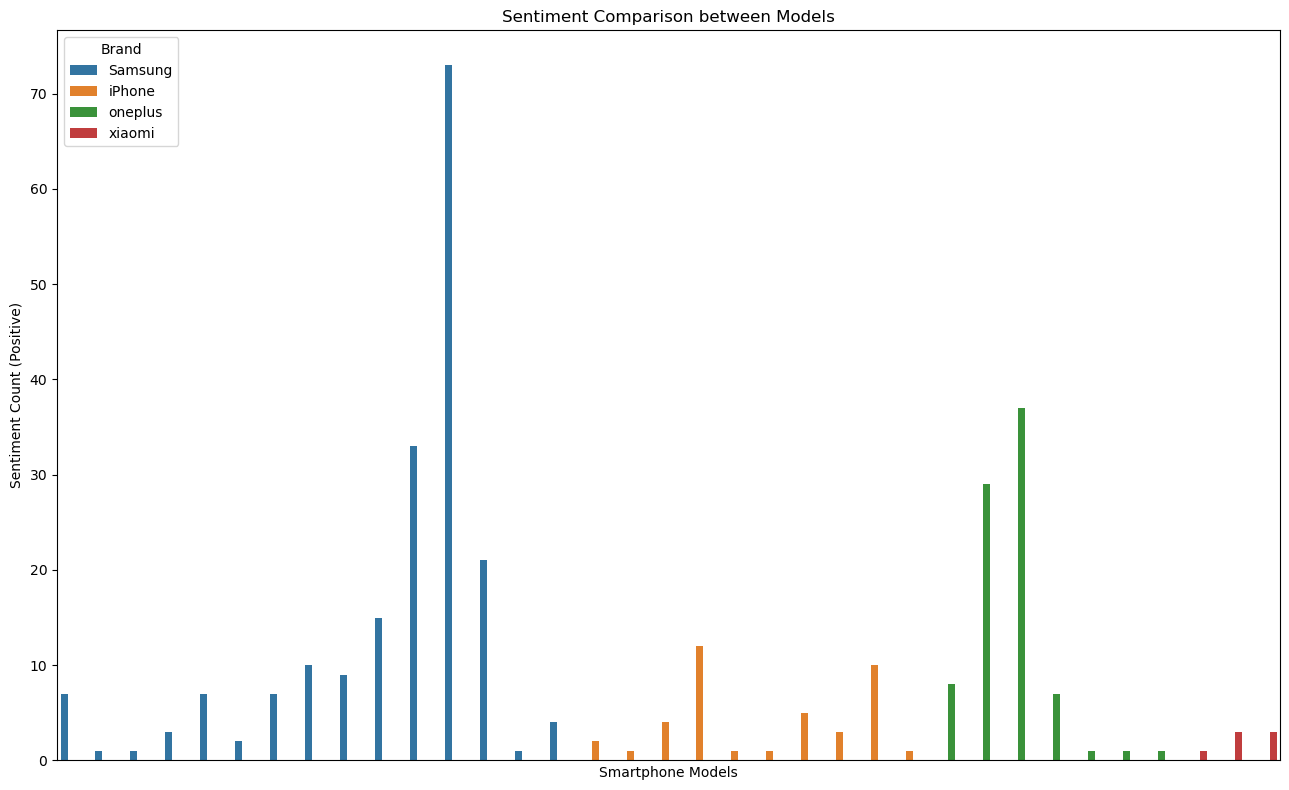

In [84]:
plt.figure(figsize=(13, 8))
sns.barplot(x='Model', y ='POSITIVE', data = comparison_positive, hue='brand')
plt.title('Sentiment Comparison between Models')
plt.xlabel('Smartphone Models')
plt.ylabel('Sentiment Count (Positive)')
plt.xticks([])
plt.legend(title='Brand', loc='upper left')
plt.tight_layout()
plt.show()

In [85]:
samsung_negative = comparison[comparison['brand'] == 'Samsung'].sort_values(by='NEGATIVE', ascending=False)
iphone_negative = comparison[comparison['brand'] == 'iPhone'].sort_values(by='NEGATIVE', ascending=False)
xiaomi_negative = comparison[comparison['brand'] == 'xiaomi'].sort_values(by='NEGATIVE', ascending=False)
oneplus_negative = comparison[comparison['brand'] == 'oneplus'].sort_values(by='NEGATIVE', ascending=False)

In [86]:
samsung_negative

sentiment,brand,Model,NEGATIVE,POSITIVE
35,Samsung,samsung s24,41,73
34,Samsung,samsung s23,23,33
33,Samsung,samsung s22,17,15
29,Samsung,samsung s10,11,7
32,Samsung,samsung s21,7,9
6,Samsung,samsung a35,6,1
42,Samsung,samsung s9,6,4
8,Samsung,samsung a55,4,1
24,Samsung,samsung galaxy s24,4,2
31,Samsung,samsung s20,3,10


In [87]:
iphone_negative

sentiment,brand,Model,NEGATIVE,POSITIVE
51,iPhone,iphone 13,13,4
63,iPhone,iphone 16 pro,9,3
57,iPhone,iphone 15,8,1
61,iPhone,iphone 16,8,5
46,iPhone,iphone 11,7,2
48,iPhone,iphone 12,7,1
54,iPhone,iphone 14,3,12
64,iPhone,iphone 16 pro max,3,10
55,iPhone,iphone 14 pro,1,1
65,iPhone,iphone 5,1,1


In [88]:
xiaomi_negative

sentiment,brand,Model,NEGATIVE,POSITIVE
86,xiaomi,redmi 12,3,3
94,xiaomi,redmi note 13,3,3
83,xiaomi,mi 9,2,1


In [89]:
oneplus_negative

sentiment,brand,Model,NEGATIVE,POSITIVE
72,oneplus,OnePlus 12,20,29
71,oneplus,OnePlus 11,12,8
73,oneplus,OnePlus 13,12,37
75,oneplus,OnePlus 7,3,7
77,oneplus,OnePlus 9,3,1
76,oneplus,OnePlus 8,2,1
80,oneplus,OnePlus Nord 4,1,1


In [90]:
comparison_negative  = comparison[comparison['NEGATIVE'] != 0]

In [91]:
comparison_negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 2 to 94
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   brand     35 non-null     object
 1   Model     35 non-null     object
 2   NEGATIVE  35 non-null     int64 
 3   POSITIVE  35 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


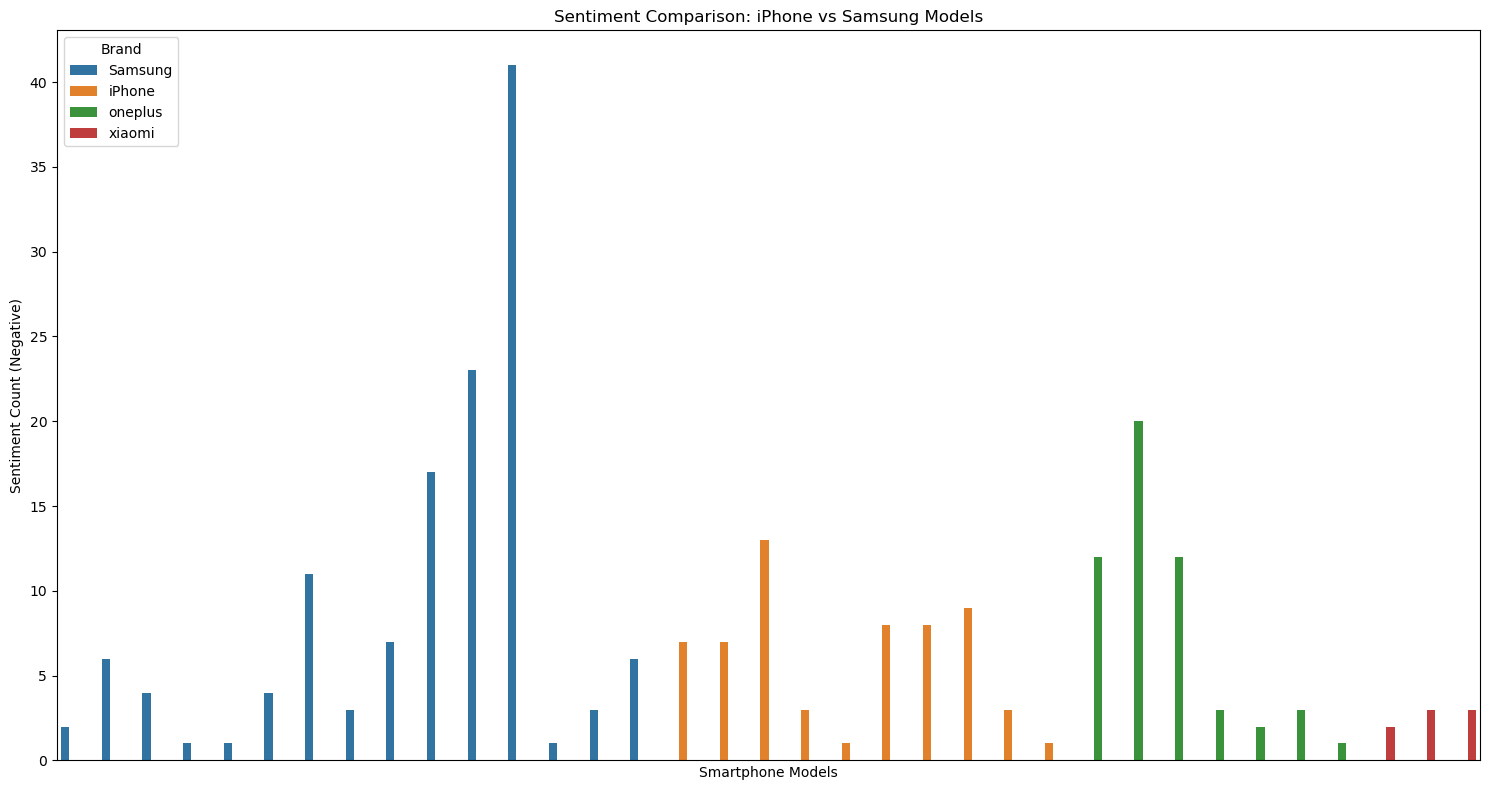

In [92]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='NEGATIVE', data=comparison_negative.reset_index(), hue='brand')
plt.title('Sentiment Comparison: iPhone vs Samsung Models')
plt.xlabel('Smartphone Models')
plt.ylabel('Sentiment Count (Negative)')
plt.legend(title='Brand', loc='upper left')
plt.xticks([]) 
plt.tight_layout()
plt.show()

In [181]:
# List of features to check for
features = ['camera', 'battery', 'software', 'Look', 'screen','security','speed', 'charge', 'Processor', 'Gaming','water', 'Speaker','privacy']

# Dictionary to store sentiment data for each feature
feature_sentiment = {feature: [] for feature in features}

In [182]:
for feature in features:
    # Filter the data to only include rows where the 'Text' column contains the feature (case-insensitive)
    feature_data = combine[combine['Text'].str.contains(feature, case=False, na=False)]
    
    if not feature_data.empty:
        # Group by Model and sentiment, and count the occurrences
        sentiment_counts = feature_data.groupby(['Model', 'sentiment']).size().reset_index(name='count')
        
        # Pivot the data while keeping 'Model' in the index and 'sentiment' as columns
        sentiment_pivot = sentiment_counts.pivot_table(index='Model', columns='sentiment', values='count', aggfunc='sum', fill_value=0)
        
        # Reset the index to make 'Model' a column again
        sentiment_pivot = sentiment_pivot.reset_index()
        
        # Save the pivoted data for each feature in the dictionary
        feature_sentiment[feature] = sentiment_pivot
    else:
        print(f"No data found for feature: {feature}")

## for CAMERA

In [289]:
Camera = feature_sentiment['camera']

In [290]:
Camera

sentiment,Model,NEGATIVE,POSITIVE
0,OnePlus 10,0,1
1,OnePlus 12,1,1
2,OnePlus 13,1,17
3,OnePlus 7,0,4
4,OnePlus 9,1,0
5,OnePlus Nord 2,1,0
6,iphone 10,5,0
7,iphone 11,2,1
8,iphone 12 pro max,1,0
9,iphone 13,1,1


In [291]:
negative = Camera.sort_values(by='NEGATIVE', ascending=False)
positive = Camera.sort_values(by='POSITIVE', ascending=False)

In [292]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 37 to 39
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     40 non-null     object
 1   NEGATIVE  40 non-null     int64 
 2   POSITIVE  40 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [293]:
negative

sentiment,Model,NEGATIVE,POSITIVE
37,samsung s24,5,8
6,iphone 10,5,0
33,samsung s20,3,1
22,samsung a15,2,1
7,iphone 11,2,1
11,iphone 15,1,0
36,samsung s23,1,22
14,iphone 16 plus,1,0
24,samsung a35,1,0
12,iphone 15 plus,1,0


In [294]:
negative = negative.reset_index()

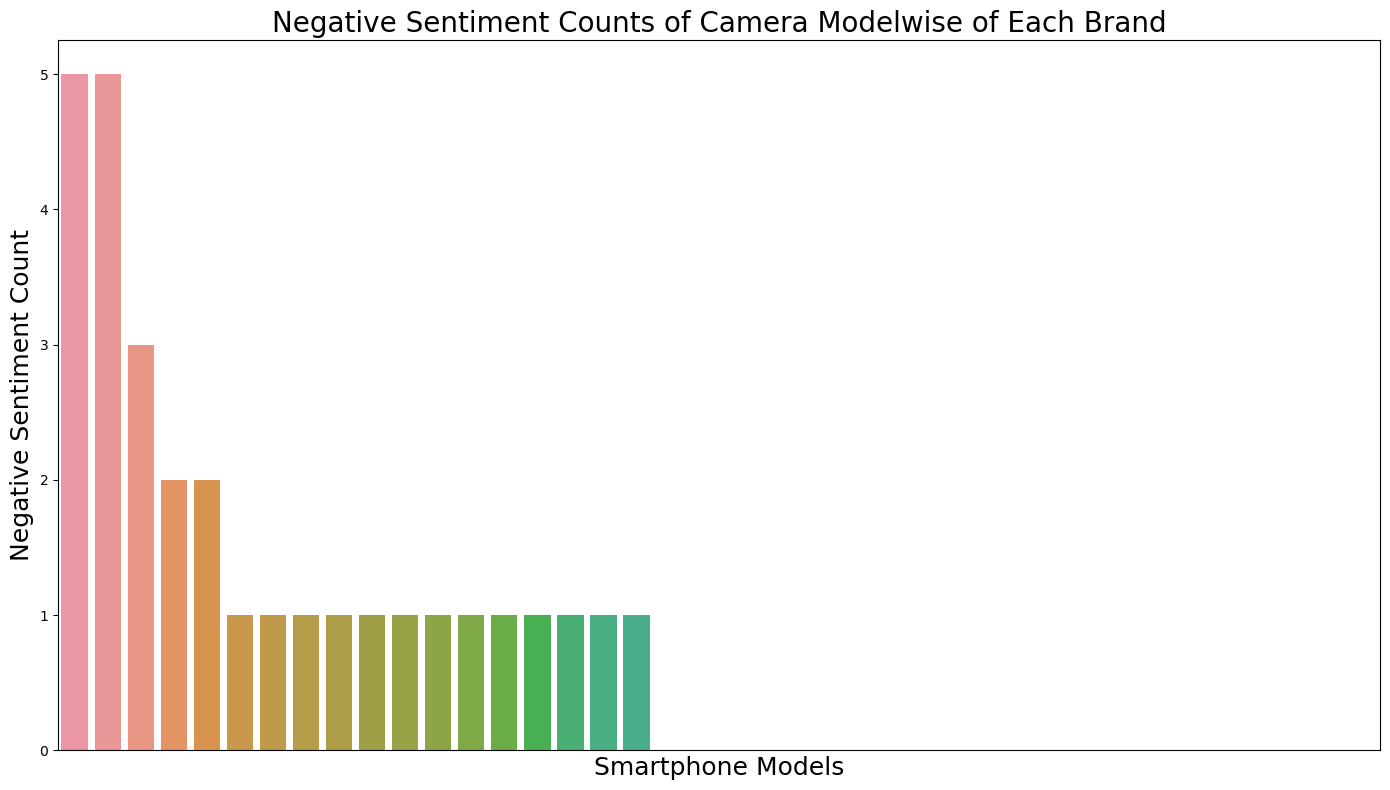

In [295]:
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='NEGATIVE', data=negative)

# Set the title and labels with increased font size
plt.title('Negative Sentiment Counts of Camera Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Negative Sentiment Count', fontsize=18)  # Increased y-label font size
plt.xticks([])  # Rotate model names for better readability

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

In [296]:
positive

sentiment,Model,NEGATIVE,POSITIVE
36,samsung s23,1,22
2,OnePlus 13,1,17
38,samsung s25,0,13
37,samsung s24,5,8
34,samsung s21,0,8
31,samsung galaxy s7,0,7
32,samsung s10,0,6
35,samsung s22,0,6
27,samsung galaxy a54,0,5
3,OnePlus 7,0,4


In [297]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 36 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     40 non-null     object
 1   NEGATIVE  40 non-null     int64 
 2   POSITIVE  40 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [298]:
positive = positive.reset_index()

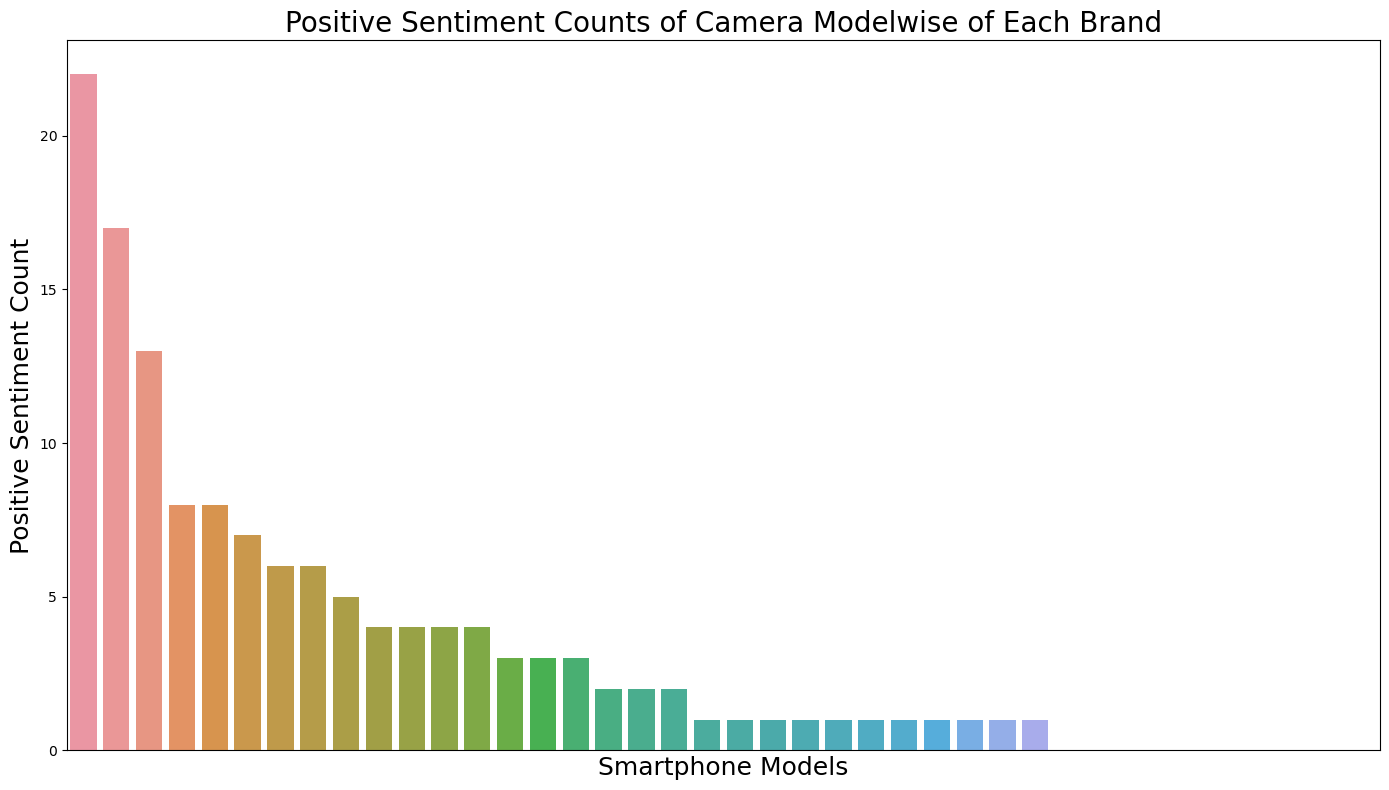

In [299]:
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='POSITIVE', data=positive)

# Set the title and labels with increased font size
plt.title('Positive Sentiment Counts of Camera Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Positive Sentiment Count', fontsize=18)  # Increased y-label font size
plt.xticks([])  # Rotate model names for better readability

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

## for Battery

In [300]:
Battery = feature_sentiment['battery']
Battery

sentiment,Model,NEGATIVE,POSITIVE
0,OnePlus 10,0,1
1,OnePlus 11,1,0
2,OnePlus 12,5,4
3,OnePlus 13,2,8
4,OnePlus 7,0,4
5,OnePlus 8,1,0
6,OnePlus 9,2,0
7,OnePlus Nord 3,1,0
8,iphone 11,2,0
9,iphone 13,6,0


In [301]:
negative = Battery.sort_values(by='NEGATIVE', ascending=False)
positive = Battery.sort_values(by='POSITIVE', ascending=False)

In [302]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 23 to 14
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     29 non-null     object
 1   NEGATIVE  29 non-null     int64 
 2   POSITIVE  29 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 928.0+ bytes


In [303]:
negative

sentiment,Model,NEGATIVE,POSITIVE
23,samsung s22,9,8
25,samsung s24,9,10
9,iphone 13,6,0
2,OnePlus 12,5,4
16,samsung a35,4,0
3,OnePlus 13,2,8
6,OnePlus 9,2,0
8,iphone 11,2,0
28,samsung s9,1,3
12,redmi 10,1,0


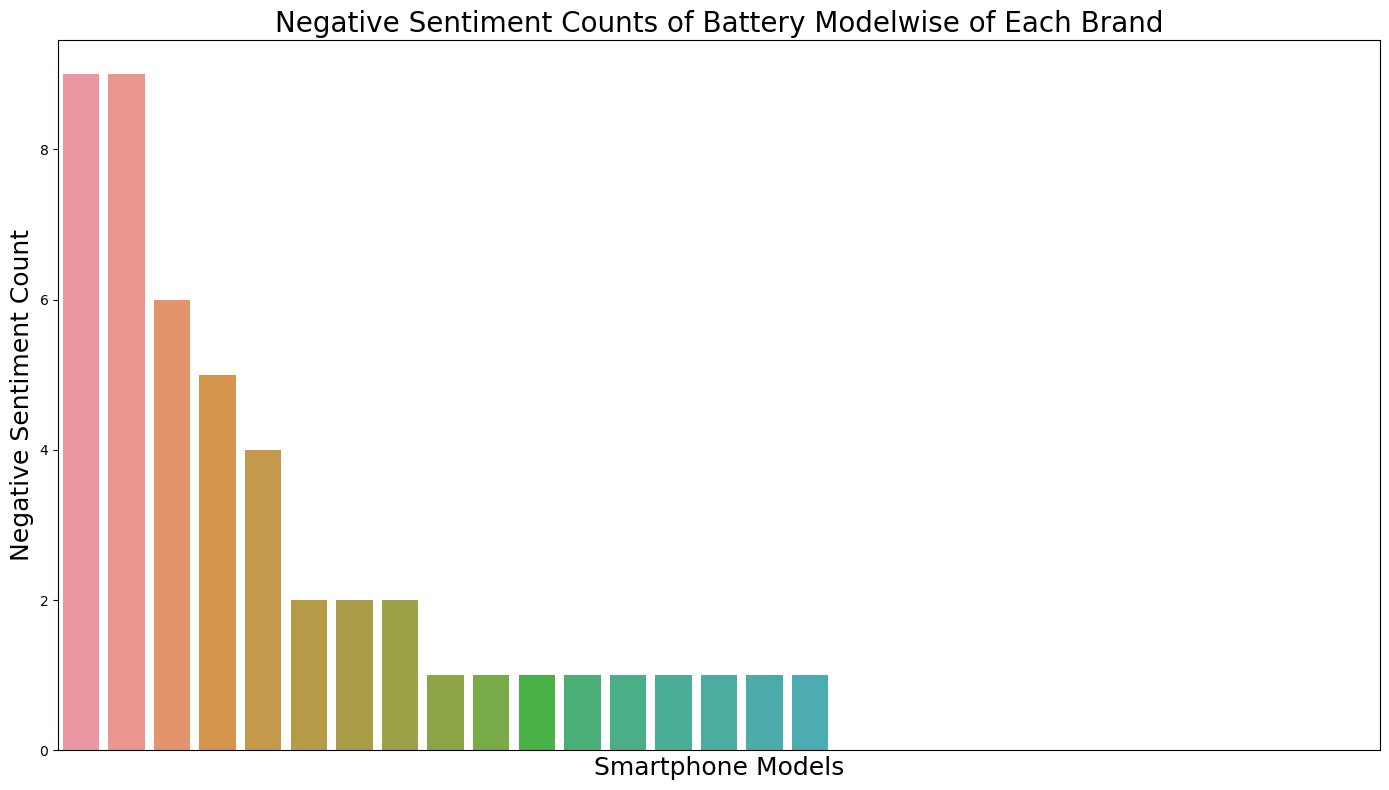

In [304]:
negative = negative.reset_index()  # Resetting index to ensure proper x-tick labeling

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='NEGATIVE', data=negative)

# Set the title and labels with increased font size
plt.title('Negative Sentiment Counts of Battery Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Negative Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

In [305]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 24 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     29 non-null     object
 1   NEGATIVE  29 non-null     int64 
 2   POSITIVE  29 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 928.0+ bytes


In [306]:
positive

sentiment,Model,NEGATIVE,POSITIVE
24,samsung s23,0,15
25,samsung s24,9,10
3,OnePlus 13,2,8
23,samsung s22,9,8
21,samsung s10,0,6
26,samsung s25,0,5
19,samsung galaxy a54,0,5
2,OnePlus 12,5,4
4,OnePlus 7,0,4
13,redmi 9c,0,4


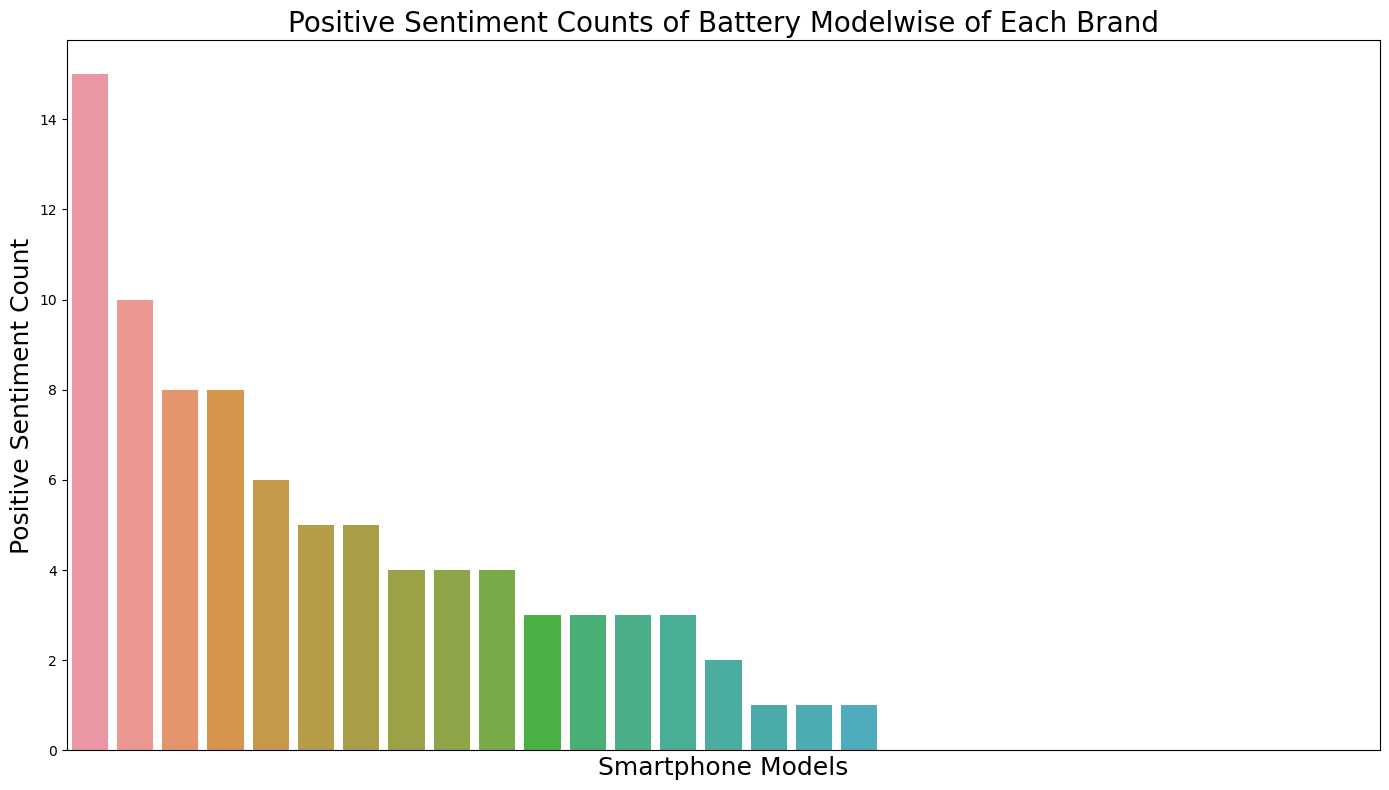

In [307]:
positive = positive.reset_index()  # Resetting index to ensure proper x-tick labeling

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='POSITIVE', data=positive)

# Set the title and labels with increased font size
plt.title('Positive Sentiment Counts of Battery Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Positive Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

## for Software Related

In [308]:
Software = feature_sentiment['software']
Software

sentiment,Model,NEGATIVE,POSITIVE
0,OnePlus 12,0,3
1,OnePlus 13,0,4
2,OnePlus 8,1,0
3,OnePlus 9,0,1
4,iphone 11,1,0
5,iphone 13,1,0
6,iphone 15 plus,1,0
7,iphone 16 pro,1,0
8,samsung a35,1,0
9,samsung galaxy a22,3,0


In [309]:
negative = Software.sort_values(by='NEGATIVE', ascending=False)
positive = Software.sort_values(by='POSITIVE', ascending=False)

In [310]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 9 to 14
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     15 non-null     object
 1   NEGATIVE  15 non-null     int64 
 2   POSITIVE  15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 480.0+ bytes


In [311]:
negative

sentiment,Model,NEGATIVE,POSITIVE
9,samsung galaxy a22,3,0
12,samsung s23,3,0
2,OnePlus 8,1,0
4,iphone 11,1,0
5,iphone 13,1,0
6,iphone 15 plus,1,0
7,iphone 16 pro,1,0
8,samsung a35,1,0
10,samsung galaxy a25,1,0
0,OnePlus 12,0,3


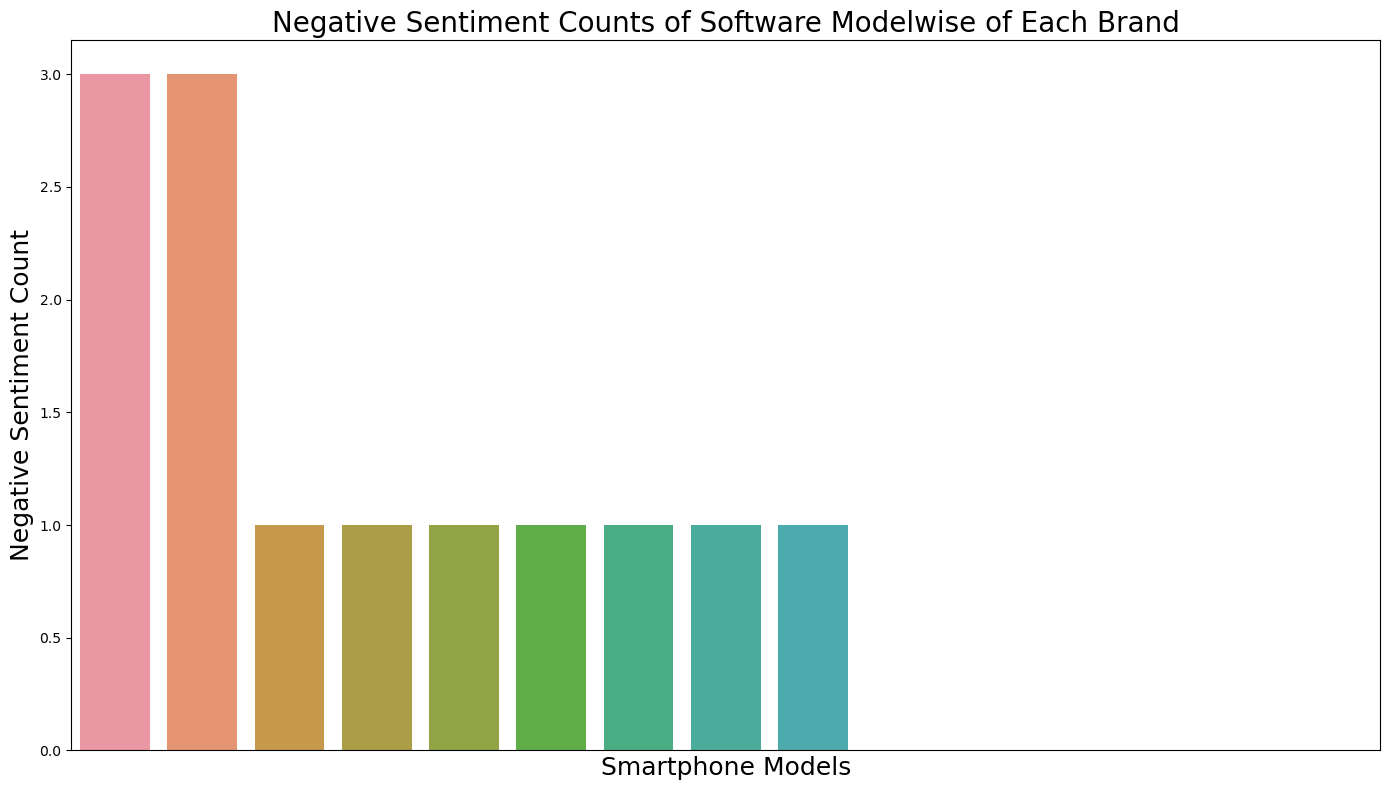

In [312]:
negative = negative.reset_index(drop=True)  # Resetting index and dropping the old index as a column
# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot using correct column names
sns.barplot(x='Model', y='NEGATIVE', data=negative)

# Set the title and labels with increased font size
plt.title('Negative Sentiment Counts of Software Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Negative Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotating x-ticks and increasing font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

In [313]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 14 to 12
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     15 non-null     object
 1   NEGATIVE  15 non-null     int64 
 2   POSITIVE  15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 480.0+ bytes


In [314]:
positive

sentiment,Model,NEGATIVE,POSITIVE
14,samsung s25,0,5
1,OnePlus 13,0,4
0,OnePlus 12,0,3
3,OnePlus 9,0,1
11,samsung s20,0,1
13,samsung s24,0,1
2,OnePlus 8,1,0
4,iphone 11,1,0
5,iphone 13,1,0
6,iphone 15 plus,1,0


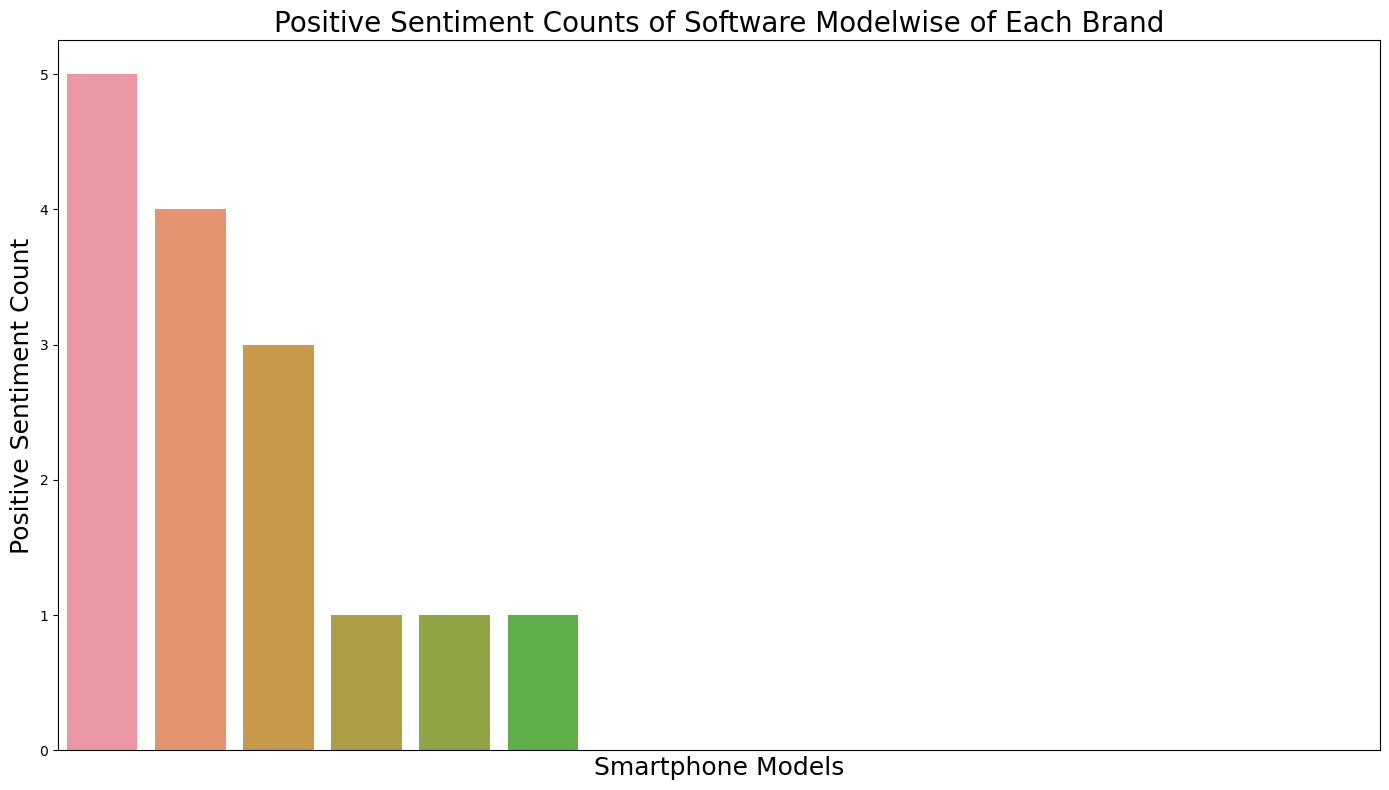

In [315]:
positive = positive.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='POSITIVE', data=positive)

# Set the title and labels with increased font size
plt.title('Positive Sentiment Counts of Software Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Positive Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

## for DESIGN /LOOK 

In [316]:
Design = feature_sentiment['Look']
Design

sentiment,Model,NEGATIVE,POSITIVE
0,OnePlus 10,0,1
1,OnePlus 11,5,0
2,OnePlus 12,6,2
3,OnePlus 13,1,15
4,OnePlus 7,0,3
5,OnePlus 8,0,1
6,OnePlus 9,1,0
7,iphone 13,2,1
8,iphone 14,1,5
9,iphone 15,2,0


In [317]:
negative

sentiment,Model,NEGATIVE,POSITIVE
0,samsung galaxy a22,3,0
1,samsung s23,3,0
2,OnePlus 8,1,0
3,iphone 11,1,0
4,iphone 13,1,0
5,iphone 15 plus,1,0
6,iphone 16 pro,1,0
7,samsung a35,1,0
8,samsung galaxy a25,1,0
9,OnePlus 12,0,3


In [318]:
negative = Design.sort_values(by='NEGATIVE', ascending=False)

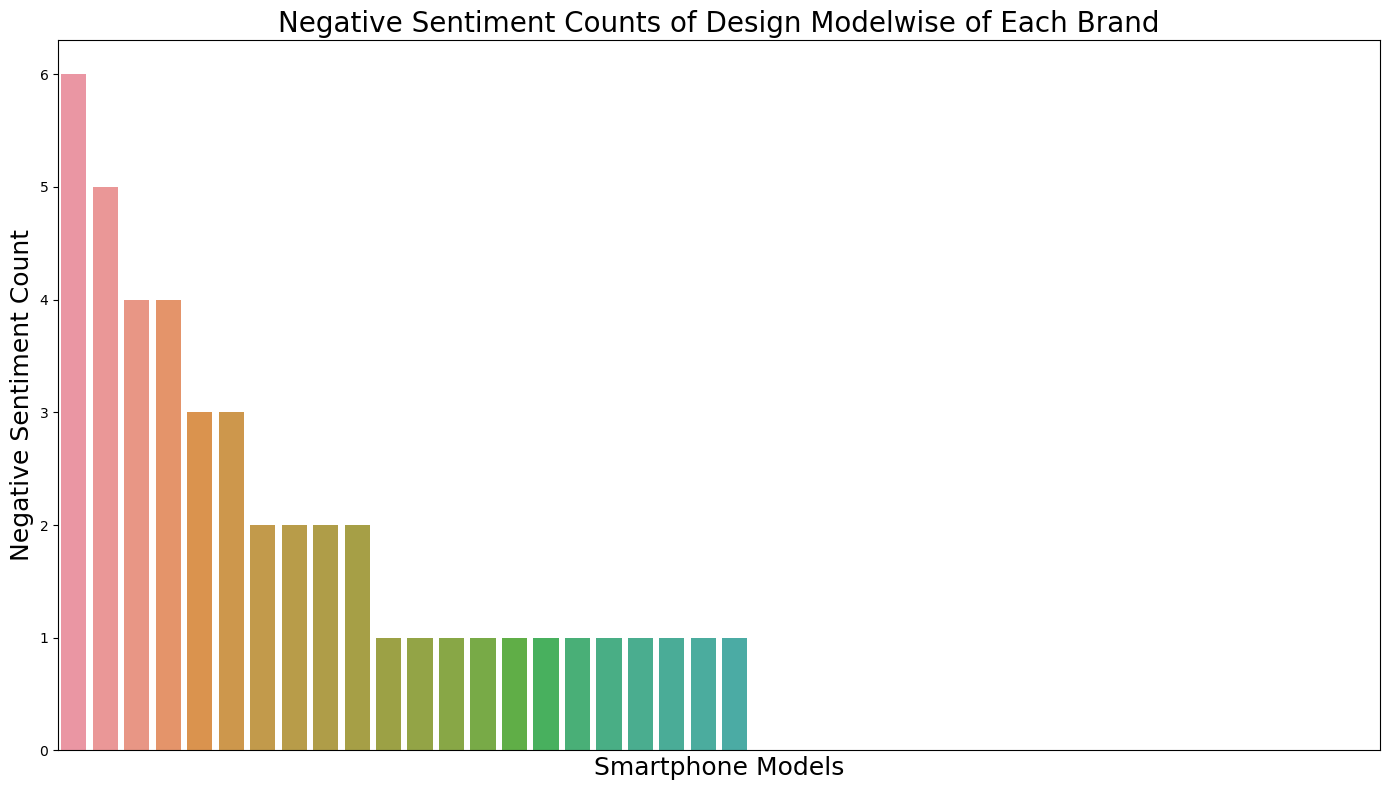

In [319]:
negative = negative.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='NEGATIVE', data=negative)

# Set the title and labels with increased font size
plt.title('Negative Sentiment Counts of Design Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Negative Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

In [320]:
positive = Design.sort_values(by='POSITIVE', ascending=False)

In [321]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 38 to 21
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     42 non-null     object
 1   NEGATIVE  42 non-null     int64 
 2   POSITIVE  42 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [322]:
positive

sentiment,Model,NEGATIVE,POSITIVE
38,samsung s24,2,17
3,OnePlus 13,1,15
36,samsung s22,0,8
31,samsung galaxy s7,0,7
13,iphone 16 pro max,0,6
39,samsung s25,1,5
8,iphone 14,1,5
37,samsung s23,1,4
33,samsung s10,4,4
17,redmi 9c,0,4


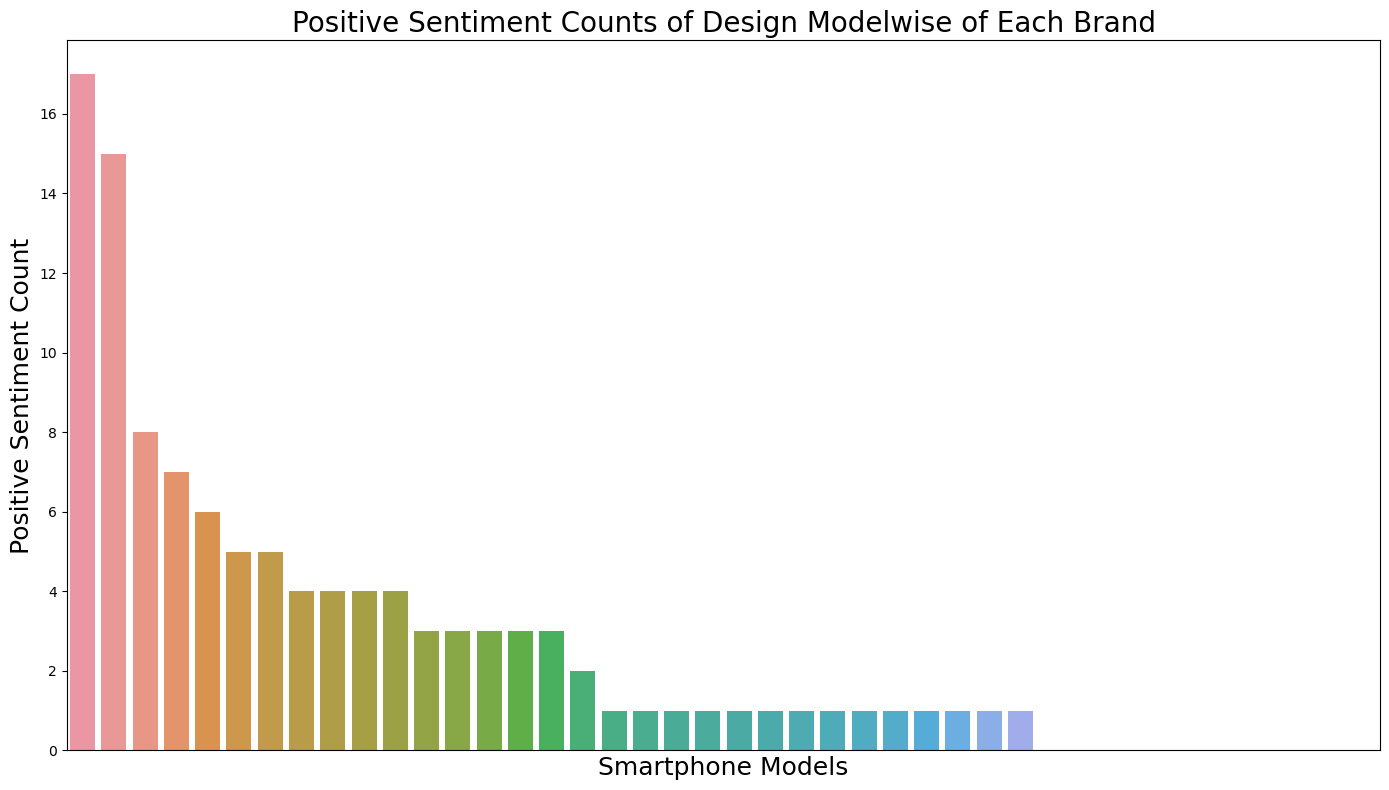

In [323]:
positive = positive.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='POSITIVE', data=positive)

# Set the title and labels with increased font size
plt.title('Positive Sentiment Counts of Design Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Positive Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

## for Display

In [324]:
Display = feature_sentiment['screen']
Display

sentiment,Model,NEGATIVE,POSITIVE
0,OnePlus 11,5,1
1,OnePlus 12,7,2
2,OnePlus 13,1,5
3,OnePlus 7,1,0
4,OnePlus 9,1,0
5,OnePlus Nord 4,1,0
6,iphone 10,5,0
7,iphone 11,2,0
8,iphone 11 pro,0,7
9,iphone 12,7,0


In [325]:
negative = Display.sort_values(by='NEGATIVE', ascending=False)

In [326]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 9 to 17
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     32 non-null     object
 1   NEGATIVE  32 non-null     int64 
 2   POSITIVE  32 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ KB


In [327]:
negative

sentiment,Model,NEGATIVE,POSITIVE
9,iphone 12,7,0
1,OnePlus 12,7,2
0,OnePlus 11,5,1
28,samsung s24,5,14
6,iphone 10,5,0
30,samsung s9,3,1
12,iphone 16,3,1
27,samsung s23,2,1
7,iphone 11,2,0
19,samsung a15,2,3


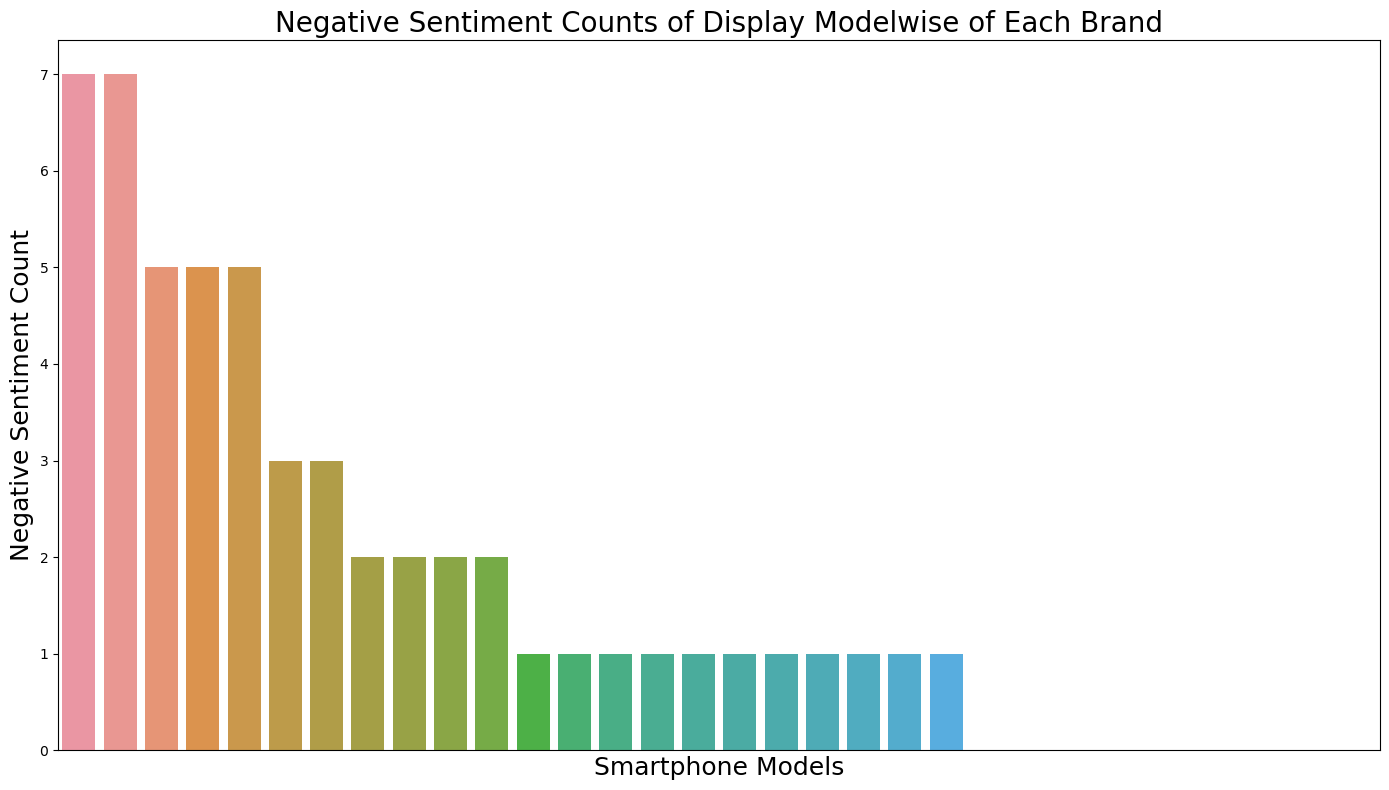

In [328]:
negative = negative.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='NEGATIVE', data=negative)

# Set the title and labels with increased font size
plt.title('Negative Sentiment Counts of Display Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Negative Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

In [329]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     42 non-null     object
 1   NEGATIVE  42 non-null     int64 
 2   POSITIVE  42 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [330]:
positive

sentiment,Model,NEGATIVE,POSITIVE
0,samsung s24,2,17
1,OnePlus 13,1,15
2,samsung s22,0,8
3,samsung galaxy s7,0,7
4,iphone 16 pro max,0,6
5,samsung s25,1,5
6,iphone 14,1,5
7,samsung s23,1,4
8,samsung s10,4,4
9,redmi 9c,0,4


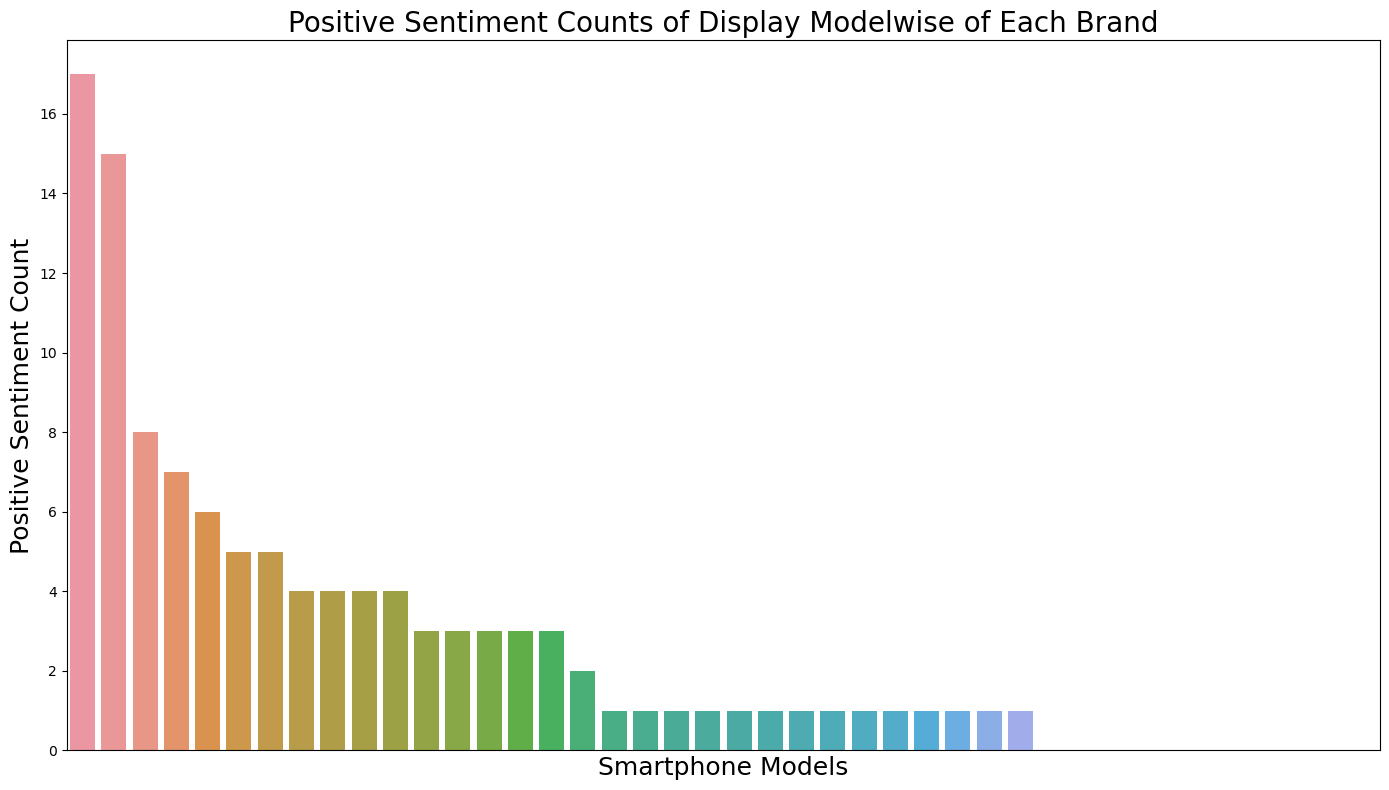

In [331]:
positive = positive.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='POSITIVE', data=positive)

# Set the title and labels with increased font size
plt.title('Positive Sentiment Counts of Display Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Positive Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

## for Safety and Security

In [332]:
Safety = feature_sentiment['security']
Safety

sentiment,Model,NEGATIVE,POSITIVE
0,OnePlus 8,1,0
1,redmi 10,1,0
2,samsung a55,1,0
3,samsung s22,7,0
4,samsung s23,3,6


In [333]:
negative = Safety.sort_values(by='NEGATIVE', ascending=False)

In [334]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 3 to 2
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     5 non-null      object
 1   NEGATIVE  5 non-null      int64 
 2   POSITIVE  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 160.0+ bytes


In [335]:
negative

sentiment,Model,NEGATIVE,POSITIVE
3,samsung s22,7,0
4,samsung s23,3,6
0,OnePlus 8,1,0
1,redmi 10,1,0
2,samsung a55,1,0


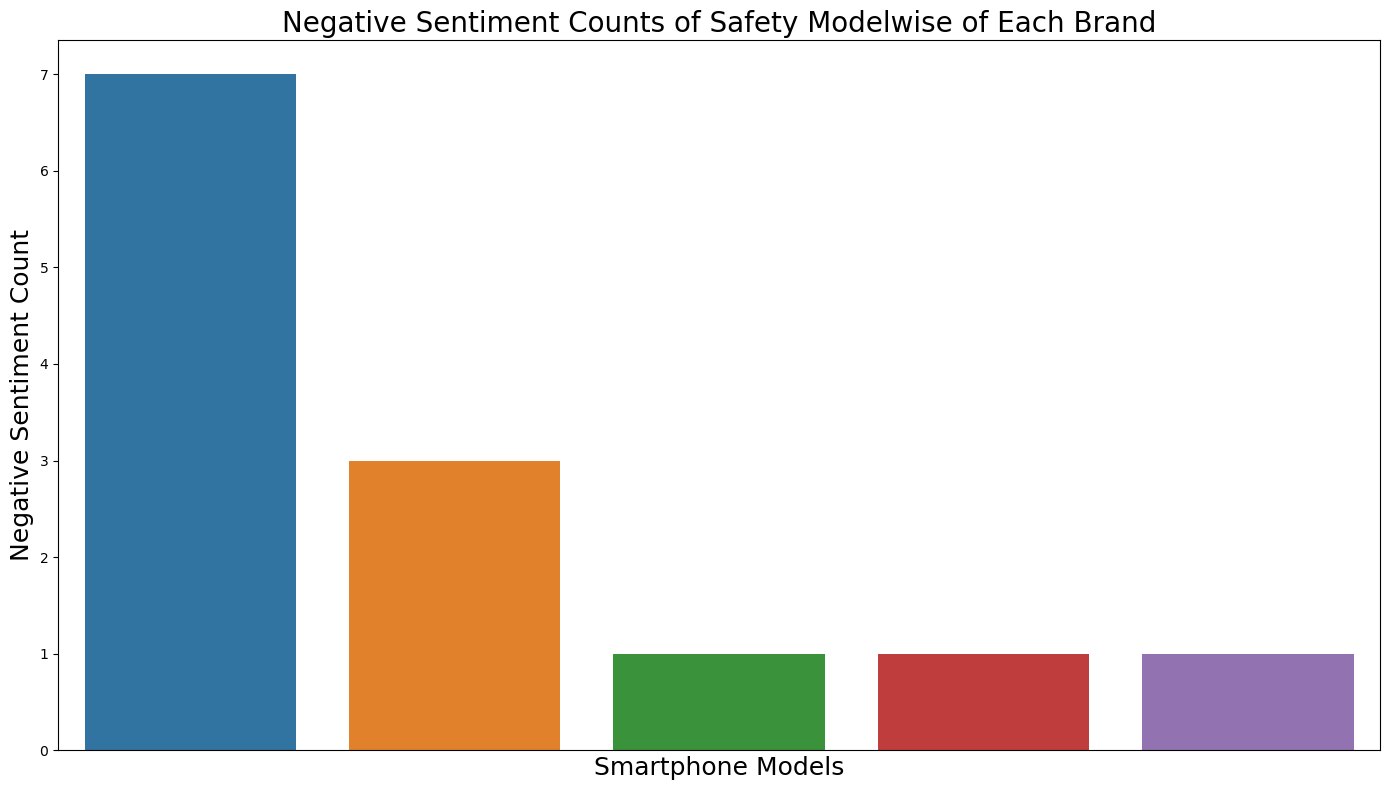

In [336]:
negative = negative.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='NEGATIVE', data=negative)

# Set the title and labels with increased font size
plt.title('Negative Sentiment Counts of Safety Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Negative Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

In [337]:
positive = Safety.sort_values(by='POSITIVE', ascending=False)

In [338]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 4 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     5 non-null      object
 1   NEGATIVE  5 non-null      int64 
 2   POSITIVE  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 160.0+ bytes


In [339]:
positive

sentiment,Model,NEGATIVE,POSITIVE
4,samsung s23,3,6
0,OnePlus 8,1,0
1,redmi 10,1,0
2,samsung a55,1,0
3,samsung s22,7,0


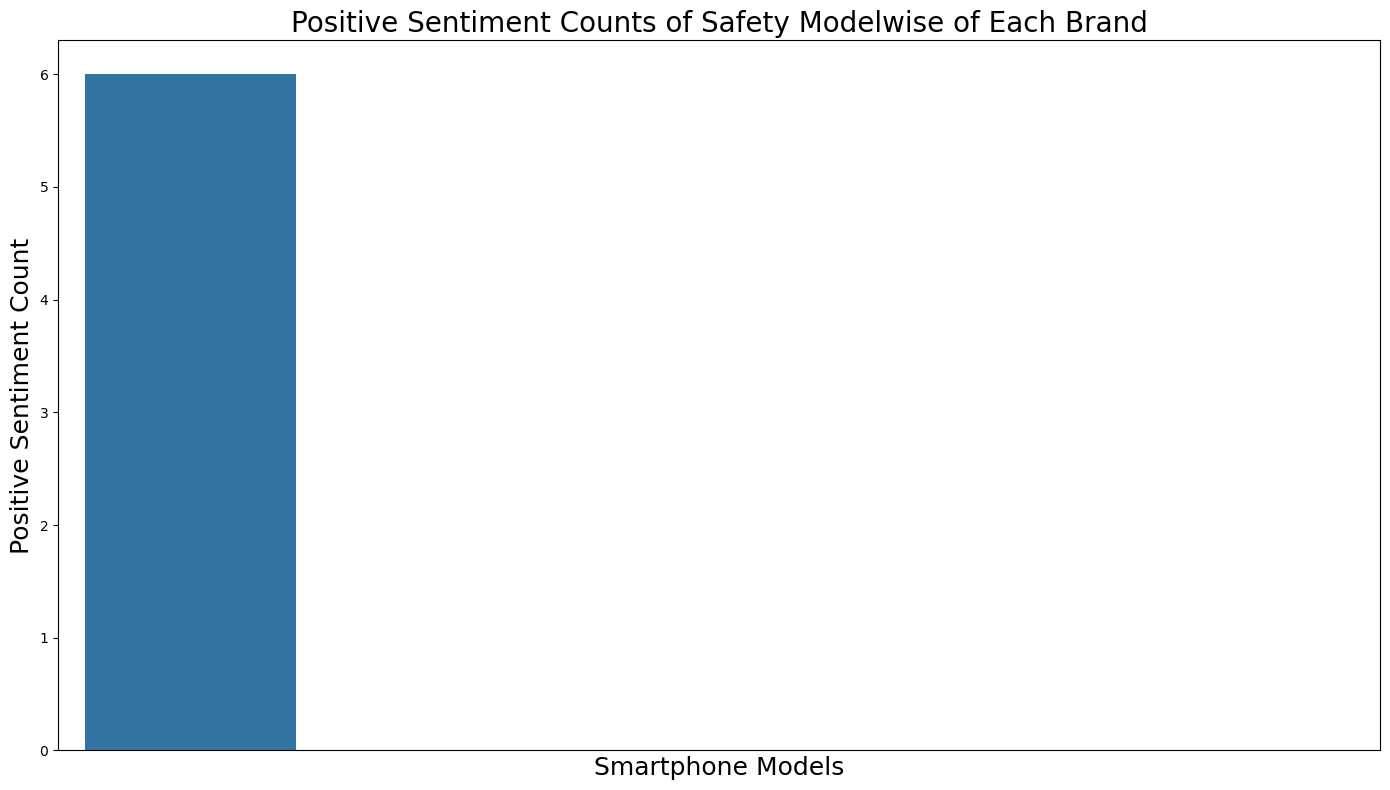

In [340]:
positive = positive.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='POSITIVE', data=positive)

# Set the title and labels with increased font size
plt.title('Positive Sentiment Counts of Safety Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Positive Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()


## for Charging

In [346]:
Charge = feature_sentiment['charge']
Charge

sentiment,Model,NEGATIVE,POSITIVE
0,OnePlus 10,0,1
1,OnePlus 12,1,1
2,OnePlus 13,1,7
3,OnePlus Nord 3,1,0
4,iphone 11,1,0
5,iphone 13,1,1
6,iphone 14,1,0
7,iphone 16,0,1
8,iphone 16 pro,2,0
9,redmi 12,1,0


In [347]:
negative = Charge.sort_values(by='NEGATIVE', ascending=False)
positive = Charge.sort_values(by='POSITIVE', ascending=False)

In [348]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 10 to 0
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     20 non-null     object
 1   NEGATIVE  20 non-null     int64 
 2   POSITIVE  20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 640.0+ bytes


In [349]:
negative

sentiment,Model,NEGATIVE,POSITIVE
10,redmi note 13,3,0
19,samsung s5,3,0
11,samsung a15,2,0
8,iphone 16 pro,2,0
1,OnePlus 12,1,1
18,samsung s23,1,8
13,samsung galaxy s21,1,0
12,samsung galaxy a25,1,0
3,OnePlus Nord 3,1,0
2,OnePlus 13,1,7


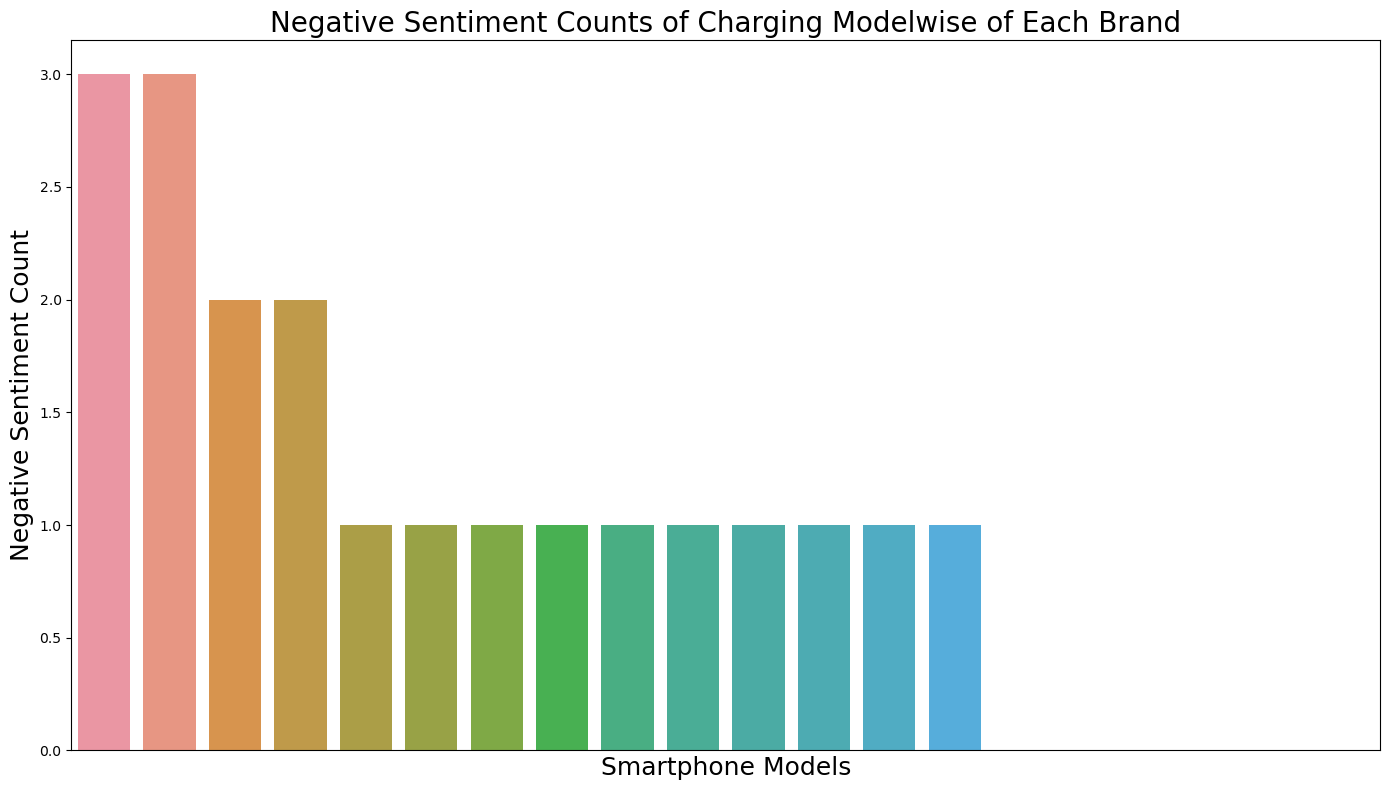

In [350]:
negative = negative.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='NEGATIVE', data=negative)

# Set the title and labels with increased font size
plt.title('Negative Sentiment Counts of Charging Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Negative Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

In [351]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 18 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     20 non-null     object
 1   NEGATIVE  20 non-null     int64 
 2   POSITIVE  20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 640.0+ bytes


In [352]:
positive

sentiment,Model,NEGATIVE,POSITIVE
18,samsung s23,1,8
2,OnePlus 13,1,7
15,samsung galaxy s7,0,7
17,samsung s22,0,6
16,samsung s10,0,3
0,OnePlus 10,0,1
5,iphone 13,1,1
7,iphone 16,0,1
14,samsung galaxy s25,0,1
1,OnePlus 12,1,1


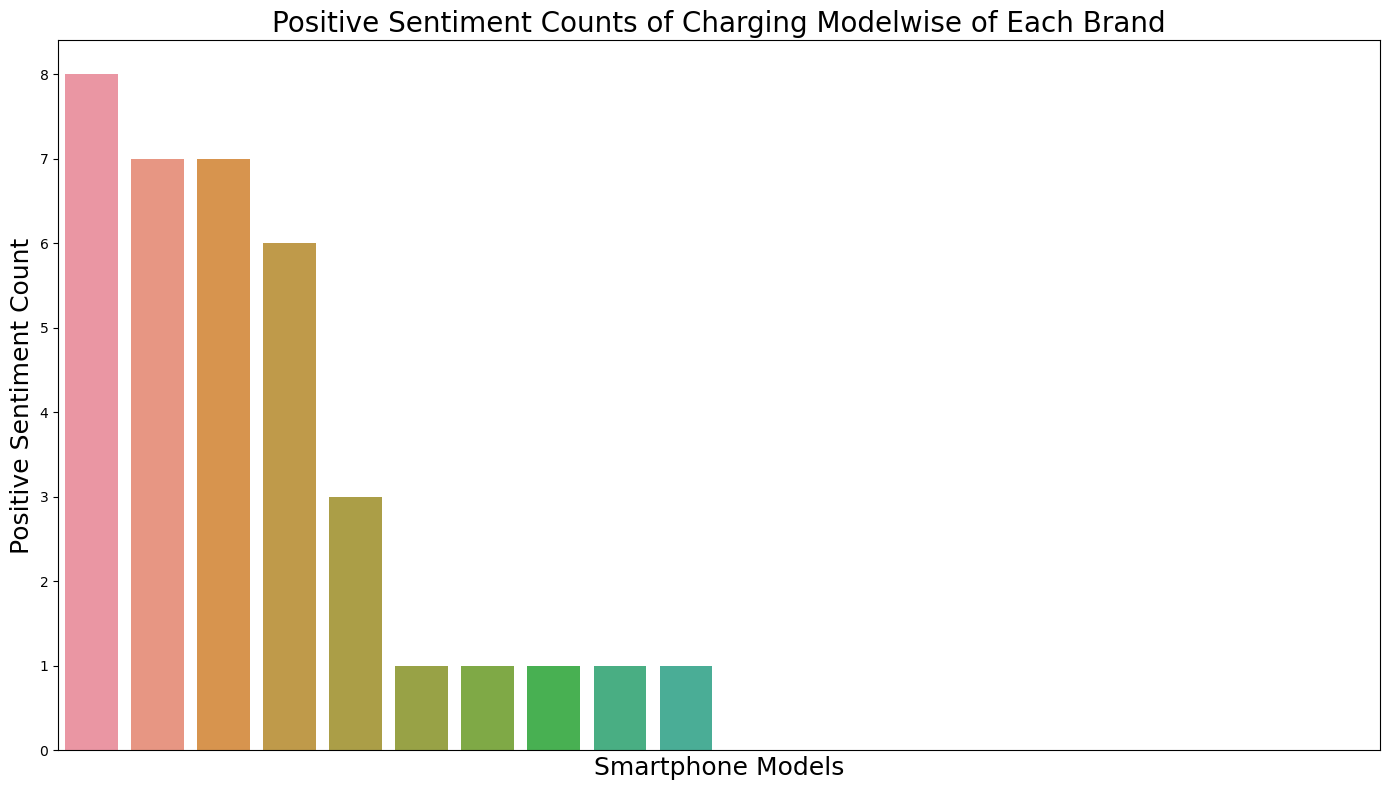

In [353]:
positive = positive.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='POSITIVE', data=positive)

# Set the title and labels with increased font size
plt.title('Positive Sentiment Counts of Charging Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Positive Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

## for Speed

In [354]:
Fast = feature_sentiment['speed']
Fast

sentiment,Model,NEGATIVE,POSITIVE
0,OnePlus 13,1,0
1,OnePlus 9,1,0
2,OnePlus Nord 3,1,0
3,iphone 15 plus,1,0
4,iphone 16 pro,0,1
5,samsung a15,2,0
6,samsung s23,0,6
7,samsung s24,0,7


In [355]:
negative = Fast.sort_values(by='NEGATIVE', ascending=False)
positive = Fast.sort_values(by='POSITIVE', ascending=False)

In [356]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 5 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     8 non-null      object
 1   NEGATIVE  8 non-null      int64 
 2   POSITIVE  8 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 256.0+ bytes


In [357]:
negative

sentiment,Model,NEGATIVE,POSITIVE
5,samsung a15,2,0
0,OnePlus 13,1,0
1,OnePlus 9,1,0
2,OnePlus Nord 3,1,0
3,iphone 15 plus,1,0
4,iphone 16 pro,0,1
6,samsung s23,0,6
7,samsung s24,0,7


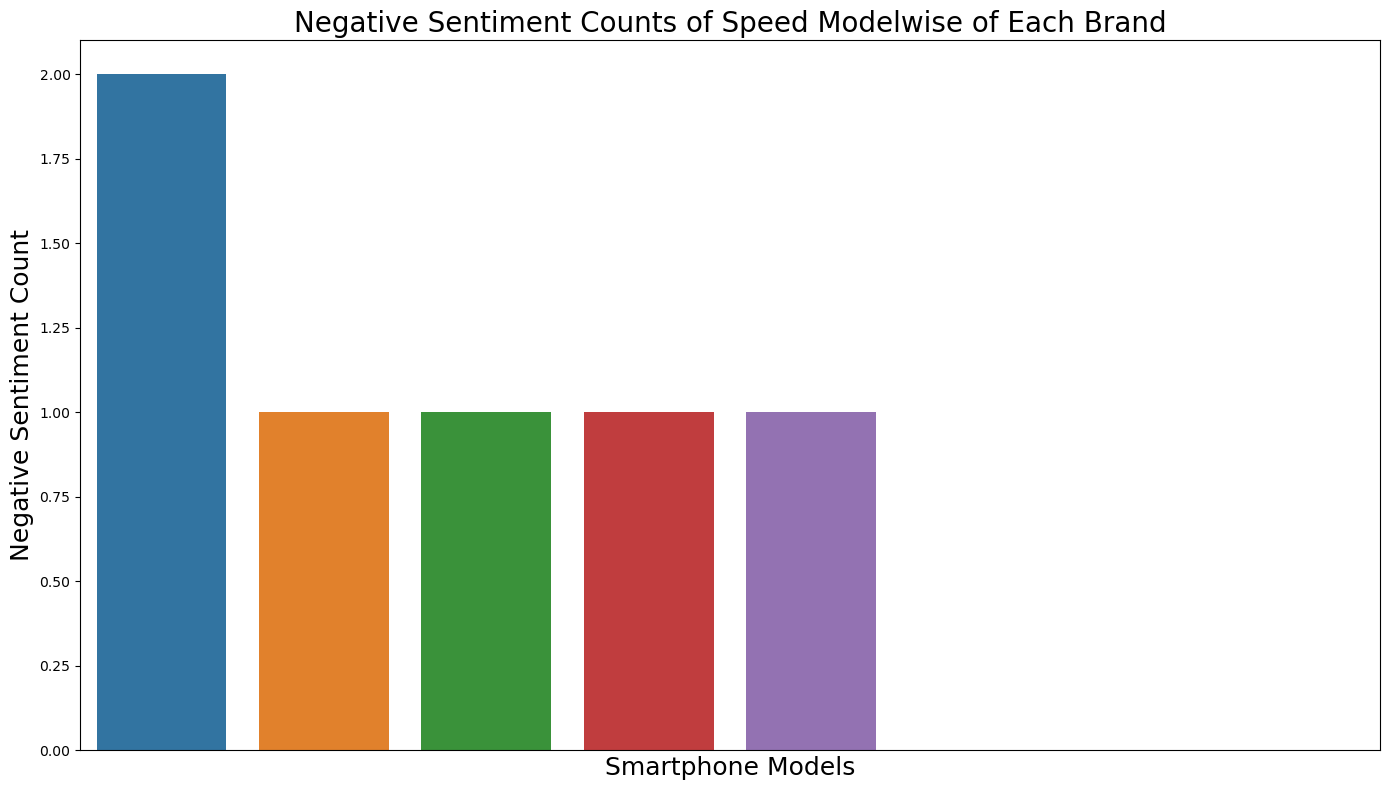

In [358]:
negative = negative.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='NEGATIVE', data=negative)

# Set the title and labels with increased font size
plt.title('Negative Sentiment Counts of Speed Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Negative Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

In [359]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 7 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     8 non-null      object
 1   NEGATIVE  8 non-null      int64 
 2   POSITIVE  8 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 256.0+ bytes


In [360]:
positive

sentiment,Model,NEGATIVE,POSITIVE
7,samsung s24,0,7
6,samsung s23,0,6
4,iphone 16 pro,0,1
0,OnePlus 13,1,0
1,OnePlus 9,1,0
2,OnePlus Nord 3,1,0
3,iphone 15 plus,1,0
5,samsung a15,2,0


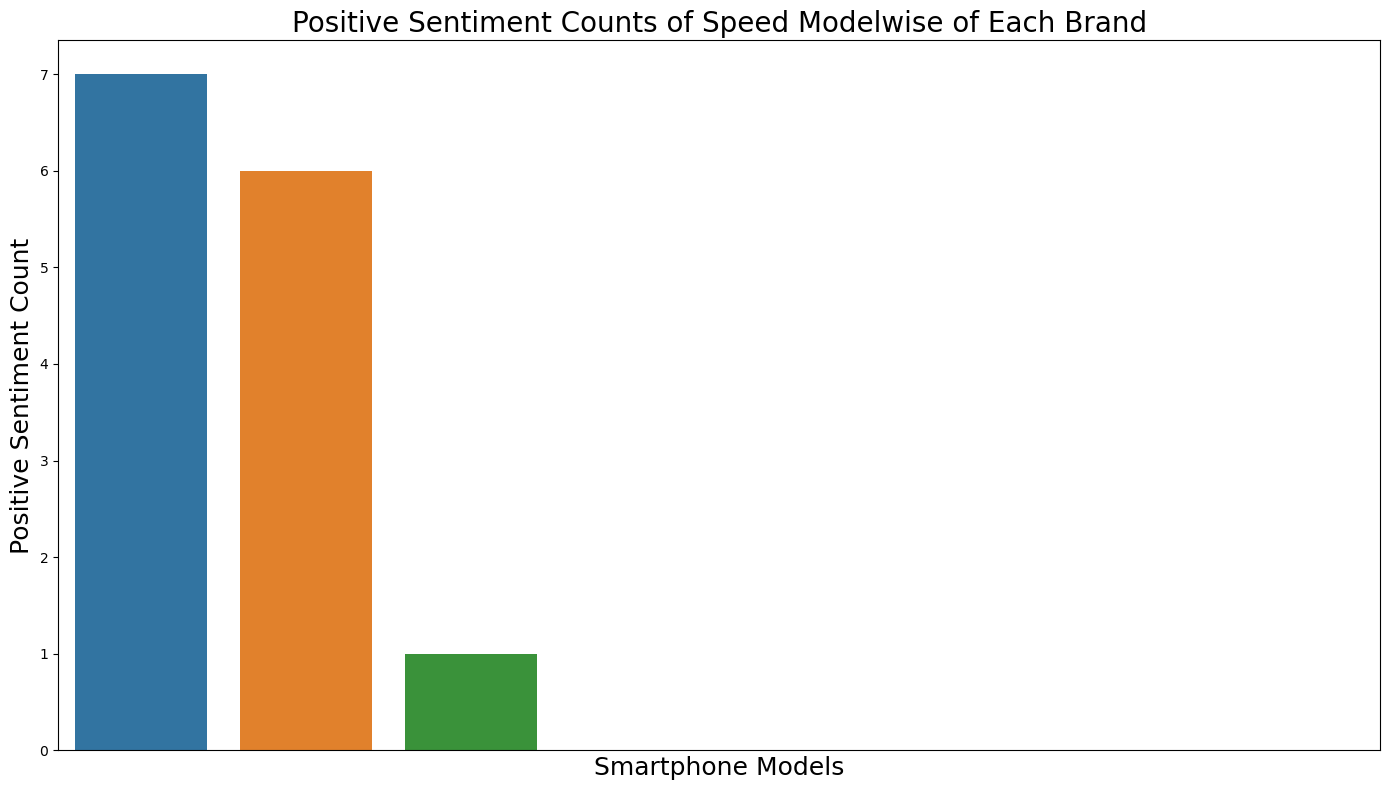

In [361]:
positive = positive.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='POSITIVE', data=positive)

# Set the title and labels with increased font size
plt.title('Positive Sentiment Counts of Speed Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Positive Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

## for Gaming

In [362]:
Gaming = feature_sentiment['Gaming']
Gaming

sentiment,Model,NEGATIVE,POSITIVE
0,OnePlus 10,0,1
1,OnePlus 12,1,0
2,OnePlus 9,1,0
3,redmi 13c,0,1
4,redmi note 11,0,1
5,samsung a15,2,0
6,samsung a55,1,0
7,samsung s10,0,3
8,samsung s23,1,6
9,samsung s24,0,7


In [363]:
negative = Gaming.sort_values(by='NEGATIVE', ascending=False)
positive = Gaming.sort_values(by='POSITIVE', ascending=False)

In [364]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 5 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     11 non-null     object
 1   NEGATIVE  11 non-null     int64 
 2   POSITIVE  11 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 352.0+ bytes


In [365]:
negative

sentiment,Model,NEGATIVE,POSITIVE
5,samsung a15,2,0
1,OnePlus 12,1,0
2,OnePlus 9,1,0
6,samsung a55,1,0
8,samsung s23,1,6
10,samsung s9,1,0
0,OnePlus 10,0,1
3,redmi 13c,0,1
4,redmi note 11,0,1
7,samsung s10,0,3


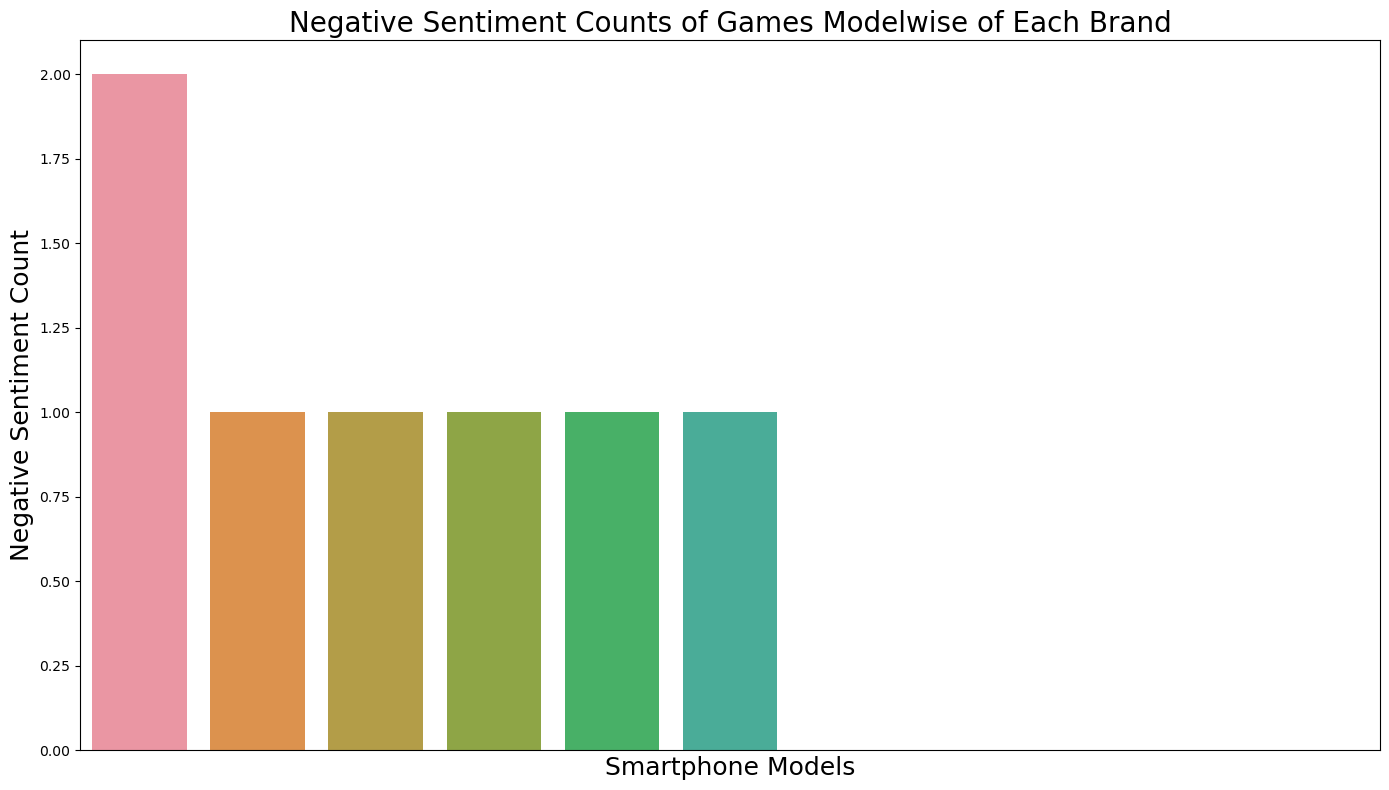

In [366]:
negative = negative.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='NEGATIVE', data=negative)

# Set the title and labels with increased font size
plt.title('Negative Sentiment Counts of Games Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Negative Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

In [367]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 9 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     11 non-null     object
 1   NEGATIVE  11 non-null     int64 
 2   POSITIVE  11 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 352.0+ bytes


In [368]:
positive

sentiment,Model,NEGATIVE,POSITIVE
9,samsung s24,0,7
8,samsung s23,1,6
7,samsung s10,0,3
0,OnePlus 10,0,1
3,redmi 13c,0,1
4,redmi note 11,0,1
1,OnePlus 12,1,0
2,OnePlus 9,1,0
5,samsung a15,2,0
6,samsung a55,1,0


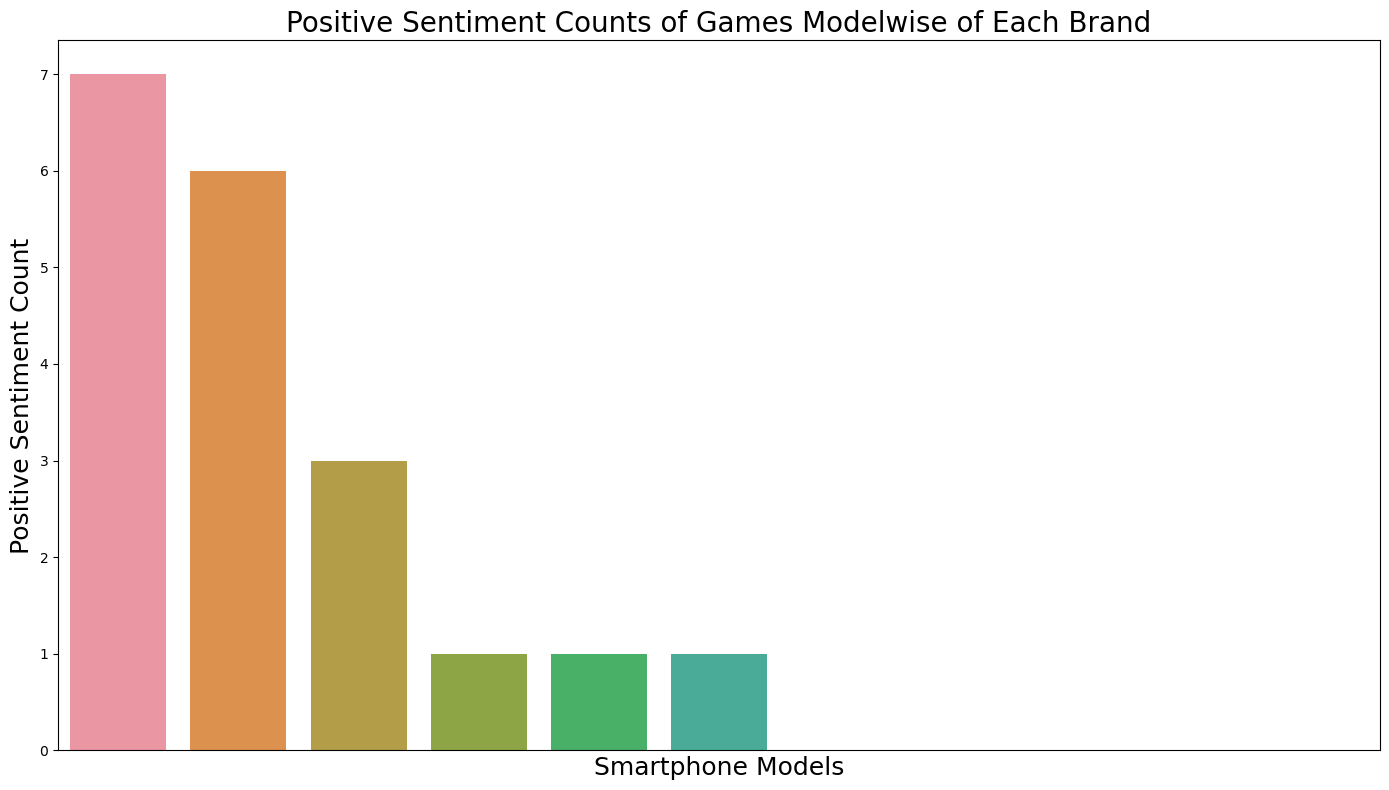

In [369]:
positive = positive.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='POSITIVE', data=positive)

# Set the title and labels with increased font size
plt.title('Positive Sentiment Counts of Games Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Positive Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

# for Water Resisance

In [370]:
Resistance = feature_sentiment['water']
Resistance

sentiment,Model,NEGATIVE,POSITIVE
0,iphone 13,6,0
1,iphone 16 pro,0,1
2,iphone 16 pro max,0,6
3,samsung s10,0,3
4,samsung s24,1,0


In [371]:
negative = Resistance.sort_values(by='NEGATIVE', ascending=False)

In [372]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     5 non-null      object
 1   NEGATIVE  5 non-null      int64 
 2   POSITIVE  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 160.0+ bytes


In [373]:
negative

sentiment,Model,NEGATIVE,POSITIVE
0,iphone 13,6,0
4,samsung s24,1,0
1,iphone 16 pro,0,1
2,iphone 16 pro max,0,6
3,samsung s10,0,3


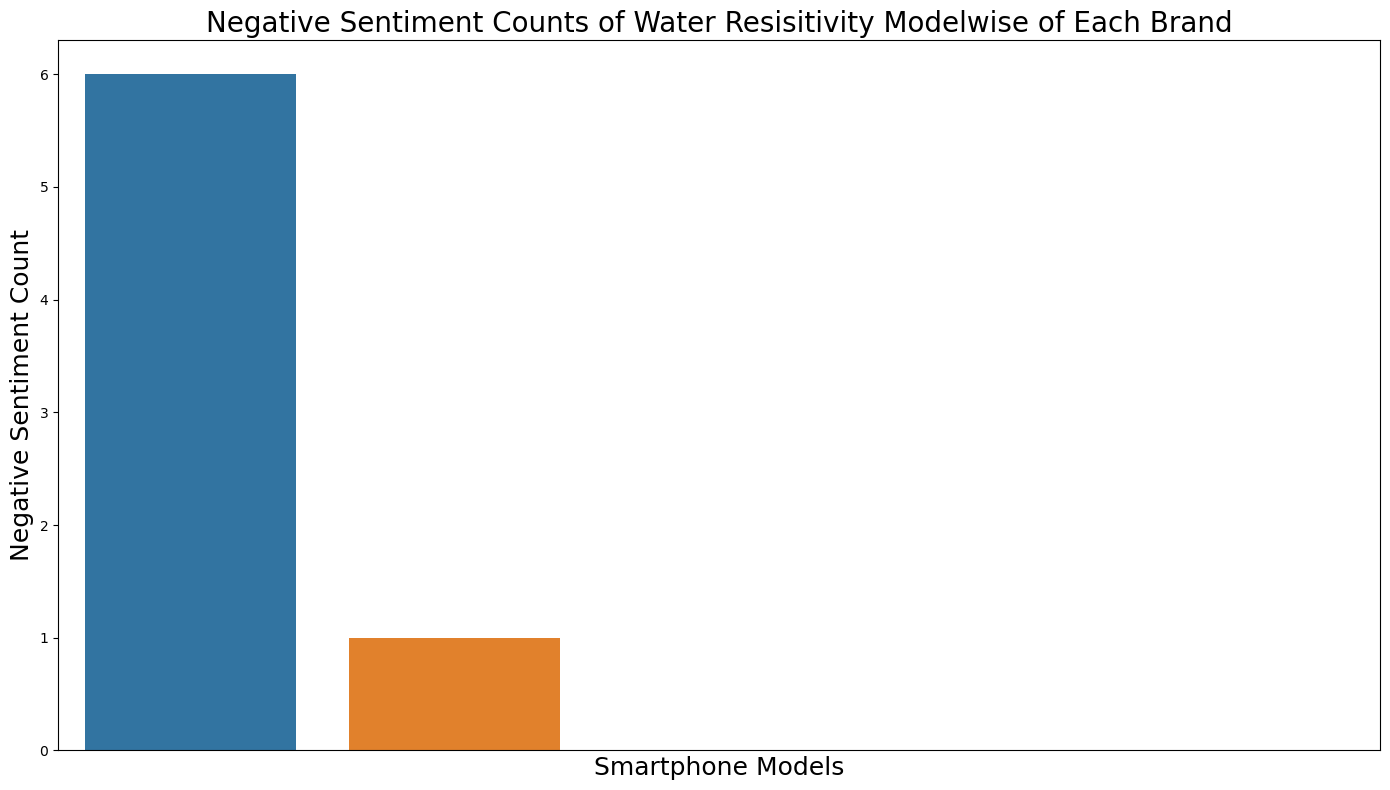

In [374]:
negative = negative.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='NEGATIVE', data=negative)

# Set the title and labels with increased font size
plt.title('Negative Sentiment Counts of Water Resisitivity Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Negative Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

In [375]:
positive = Resistance.sort_values(by='POSITIVE', ascending=False)
positive

sentiment,Model,NEGATIVE,POSITIVE
2,iphone 16 pro max,0,6
3,samsung s10,0,3
1,iphone 16 pro,0,1
0,iphone 13,6,0
4,samsung s24,1,0


In [376]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     5 non-null      object
 1   NEGATIVE  5 non-null      int64 
 2   POSITIVE  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 160.0+ bytes


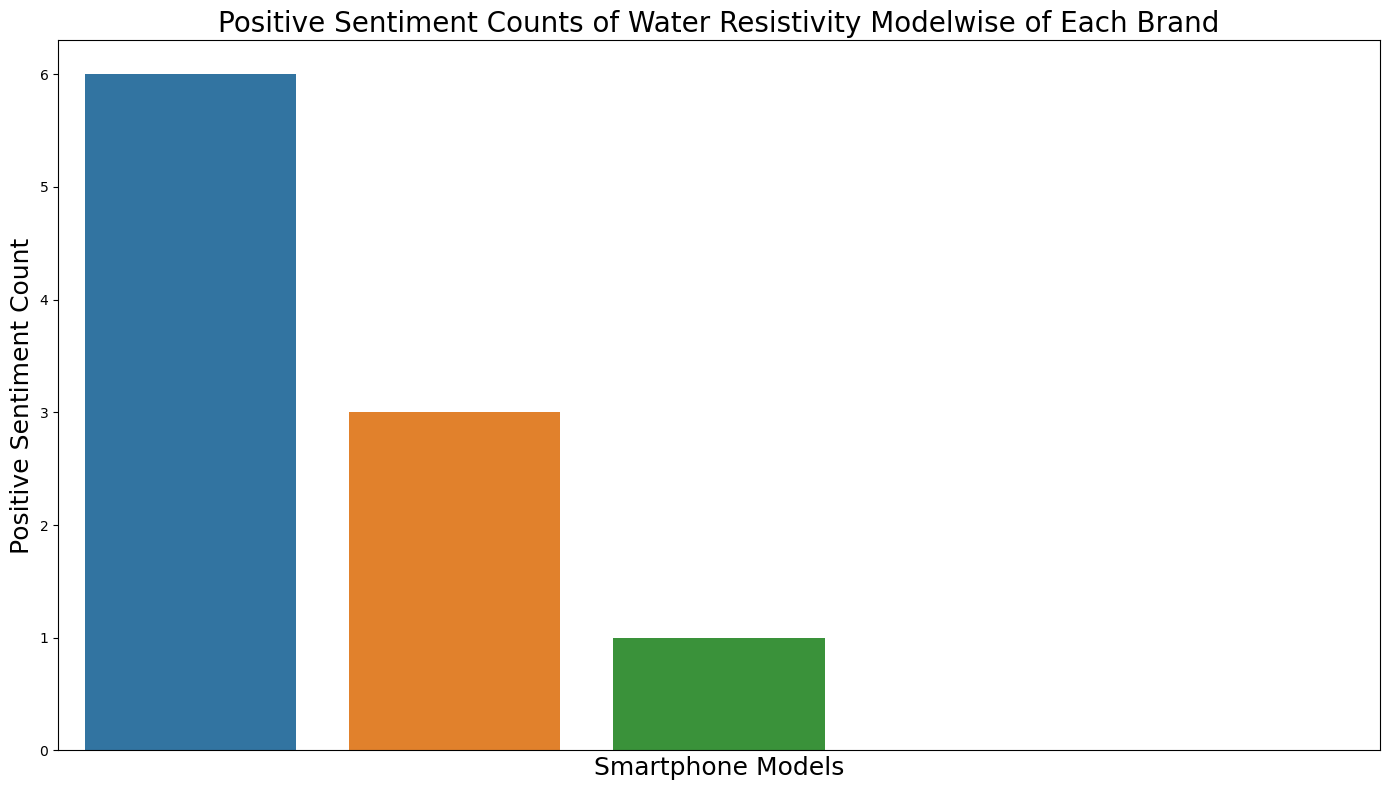

In [377]:
positive = positive.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='POSITIVE', data=positive)

# Set the title and labels with increased font size
plt.title('Positive Sentiment Counts of Water Resistivity Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Positive Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

## for Audio Quality

In [378]:
Speaker = feature_sentiment['Speaker']
Speaker

sentiment,Model,NEGATIVE,POSITIVE
0,OnePlus 13,1,0
1,iphone 13 pro,5,0
2,iphone 15 pro,1,0
3,samsung a14,0,1
4,samsung s24,2,0
5,samsung s25,0,4


In [379]:
negative = Speaker.sort_values(by='NEGATIVE', ascending=False)
positive = Speaker.sort_values(by='POSITIVE', ascending=False)

In [380]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 1 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     6 non-null      object
 1   NEGATIVE  6 non-null      int64 
 2   POSITIVE  6 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 192.0+ bytes


In [381]:
negative


sentiment,Model,NEGATIVE,POSITIVE
1,iphone 13 pro,5,0
4,samsung s24,2,0
0,OnePlus 13,1,0
2,iphone 15 pro,1,0
3,samsung a14,0,1
5,samsung s25,0,4


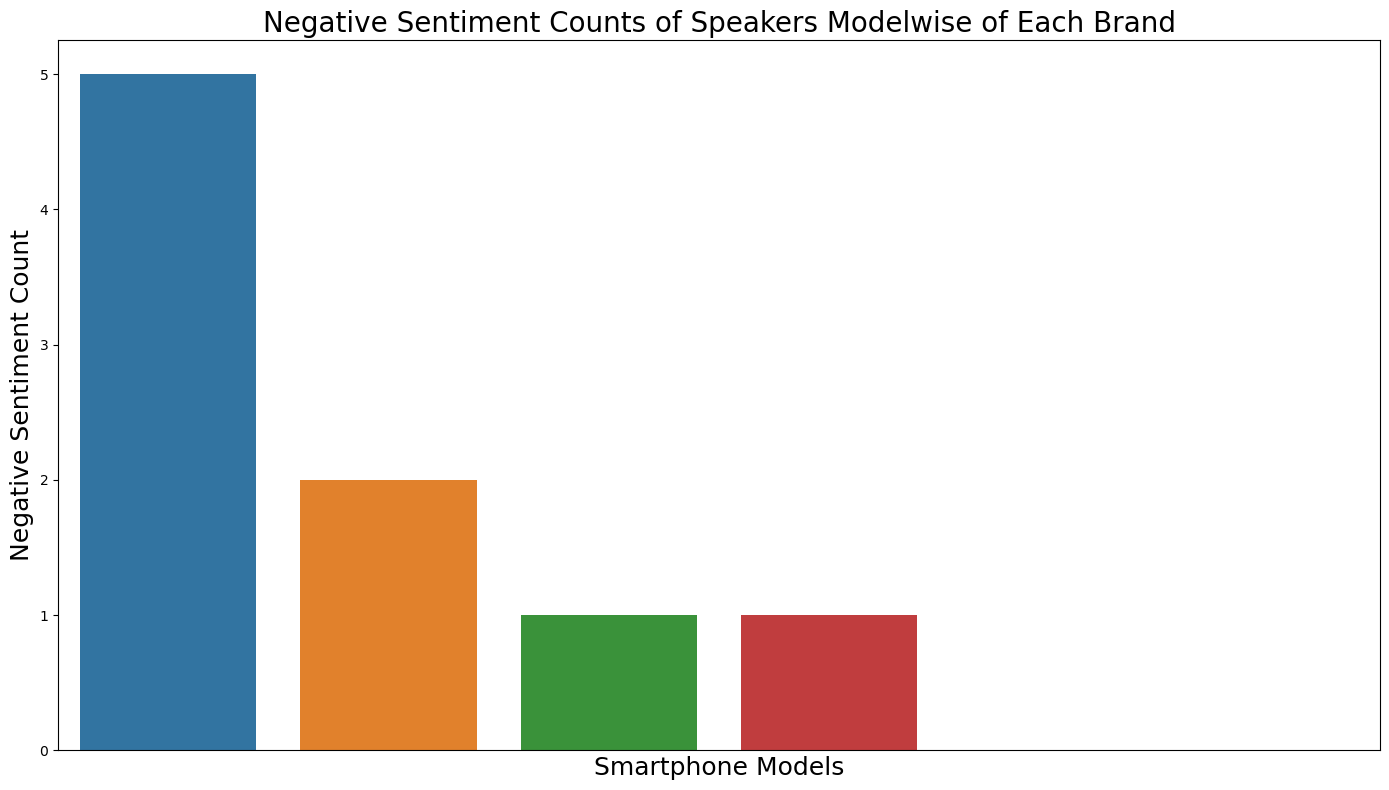

In [382]:
negative = negative.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='NEGATIVE', data=negative)

# Set the title and labels with increased font size
plt.title('Negative Sentiment Counts of Speakers Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Negative Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

In [383]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 5 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     6 non-null      object
 1   NEGATIVE  6 non-null      int64 
 2   POSITIVE  6 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 192.0+ bytes


In [384]:
positive

sentiment,Model,NEGATIVE,POSITIVE
5,samsung s25,0,4
3,samsung a14,0,1
0,OnePlus 13,1,0
1,iphone 13 pro,5,0
2,iphone 15 pro,1,0
4,samsung s24,2,0


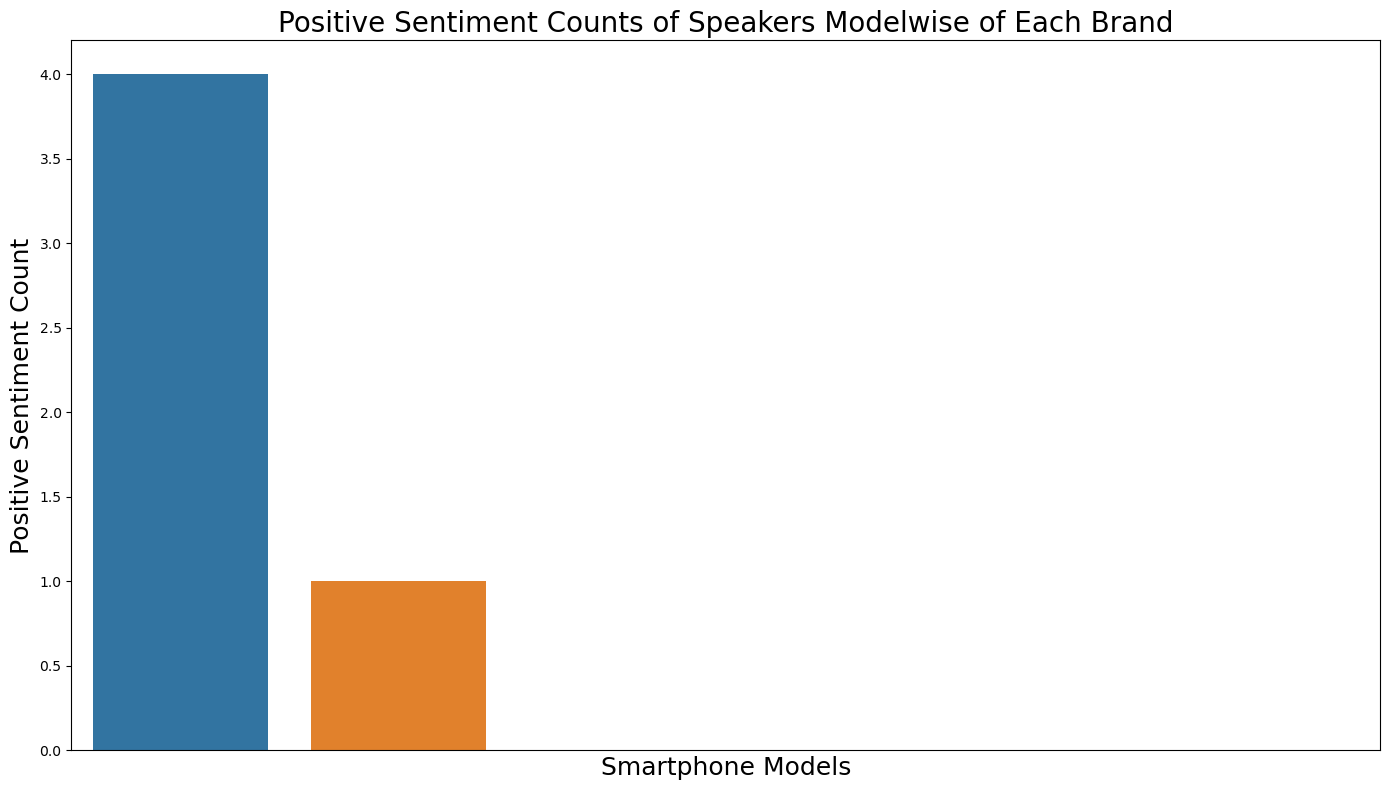

In [385]:
positive = positive.reset_index(drop=True)  # Resetting index and dropping the old index as a column

# Create the bar plot with an increased figure size
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Create the barplot
sns.barplot(x='Model', y='POSITIVE', data=positive)

# Set the title and labels with increased font size
plt.title('Positive Sentiment Counts of Speakers Modelwise of Each Brand', fontsize=20)  # Increased title font size
plt.xlabel('Smartphone Models', fontsize=18)  # Increased x-label font size
plt.ylabel('Positive Sentiment Count', fontsize=18)  # Increased y-label font size

# Rotate x-ticks for better readability and increase the font size
plt.xticks([])  # Rotated x-ticks with larger font size

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()